In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [2]:
cd /g/data/ik11/inputs/access-om3/0.x.0/1deg/

/g/data/ik11/inputs/access-om3/0.x.0/1deg


In [3]:
mom_ds = xr.open_dataset('mom/ocean_hgrid.nc')

0.3.0


In [4]:
cice_ds = xr.open_dataset('cice/grid.nc')

In [5]:
mom_ds = mom_ds.set_coords(['x','y'])

In [5]:
mom_ds

<xarray.Dataset>
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 ...

In [156]:
cicexp = mom_ds.x.sel(nyp=slice(None,None,4), nxp=slice(None,None,4))

In [155]:
ciceyp = mom_ds.y.sel(nyp=slice(None,None,4), nxp=slice(None,None,4))

ValueError: Dimensions {1} do not exist. Expected one or more of ('nyp', 'nxp')

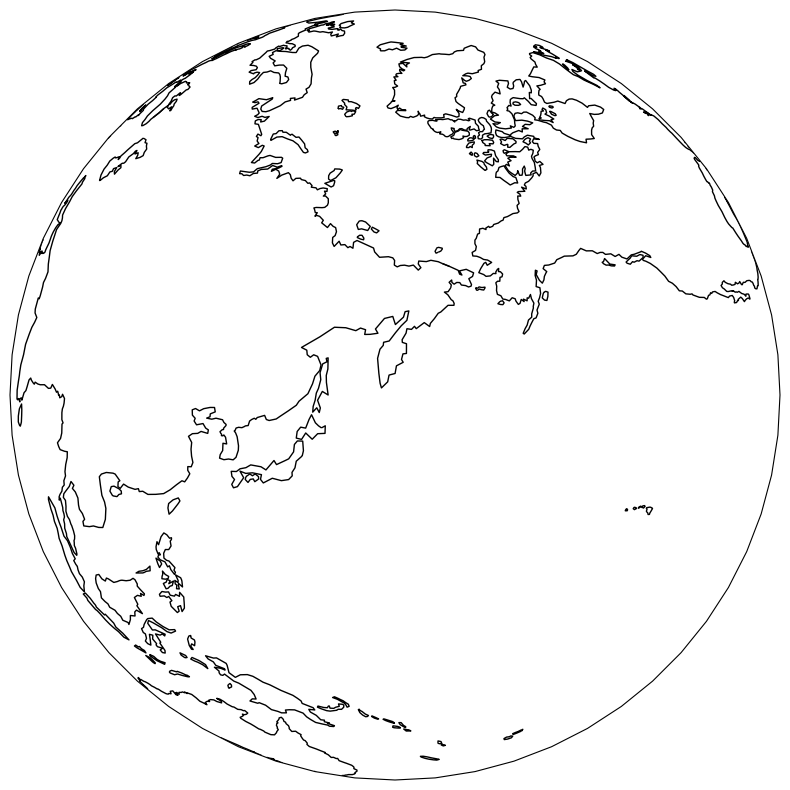

In [174]:
crs = ccrs.Orthographic(160, 50)


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)



ax.set_global()
# ax.gridlines()?
ax.coastlines()

# plt.pcolormesh(mom_ds.x, mom_ds.y, mom_ds.area, transform=ccrs.PlateCarree())

# _ = plt.plot(cicexp, ciceyp, c='k', transform=ccrs.PlateCarree())
_ = plt.plot(np.transpose(cicexp, axes=1), np.transpose(ciceyp, axes='nyp'), c='k', transform=ccrs.PlateCarree())


In [14]:
tarea = mom_ds.area.coarsen(nx=2, ny=2).sum()

In [141]:
cicexp = mom_ds.x.sel(nyp=slice(None,None,2), nxp=slice(None,None,2))

In [142]:
ciceyp = mom_ds.y.sel(nyp=slice(None,None,2), nxp=slice(None,None,2))

/jobfs/110064131.gadi-pbs/ipykernel_1976657/702584574.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,2,2,projection=crs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


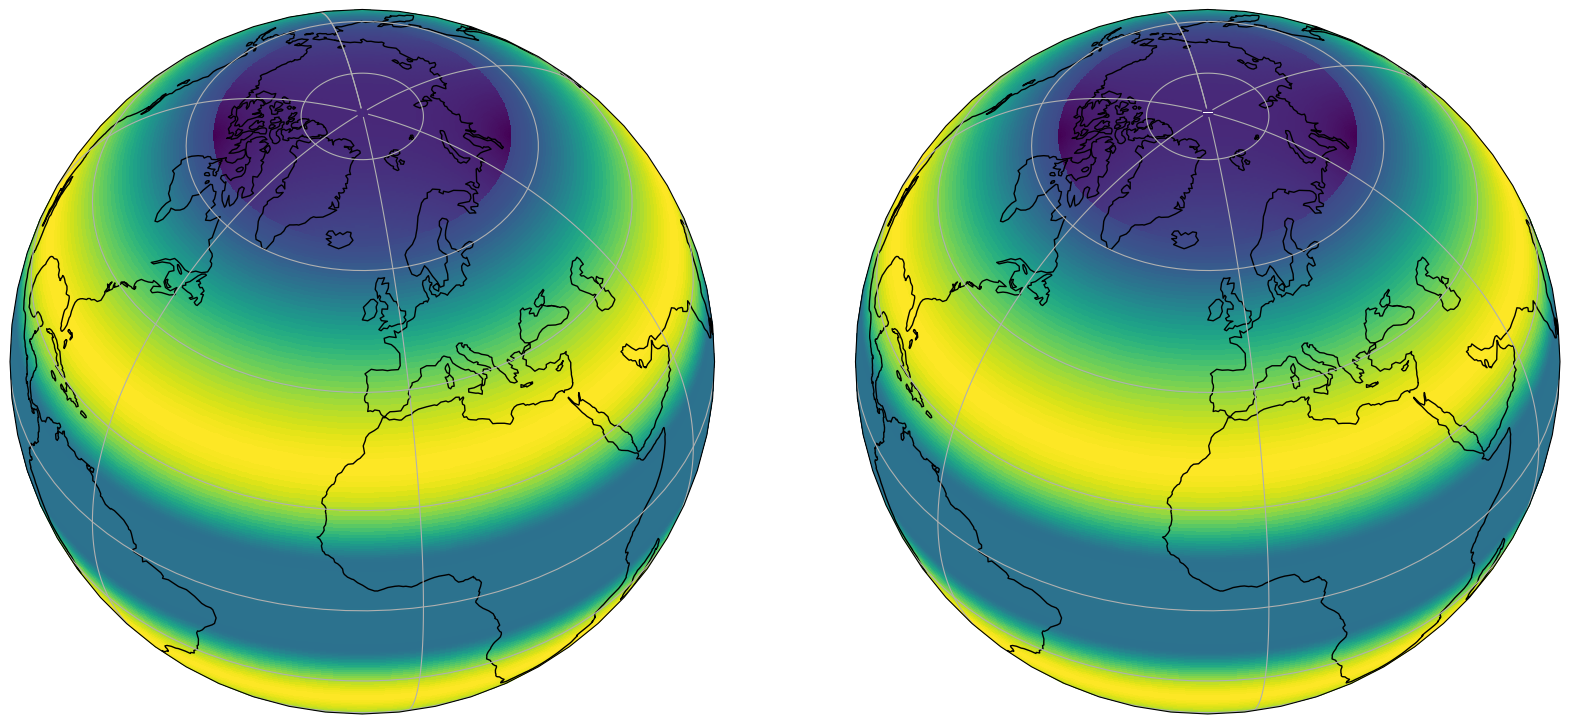

In [147]:
crs = ccrs.Orthographic(-10, 45)


plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1,projection=crs)



ax.set_global()
ax.gridlines()
ax.coastlines()

plt.pcolormesh(cicexp, ciceyp, tarea, transform=ccrs.PlateCarree())

ax = plt.axes(projection=crs)


ax = plt.subplot(1,2,2,projection=crs)
ax.set_global()
ax.gridlines()
ax.coastlines()

plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())

In [148]:
anoms = tarea-cice_ds.tarea

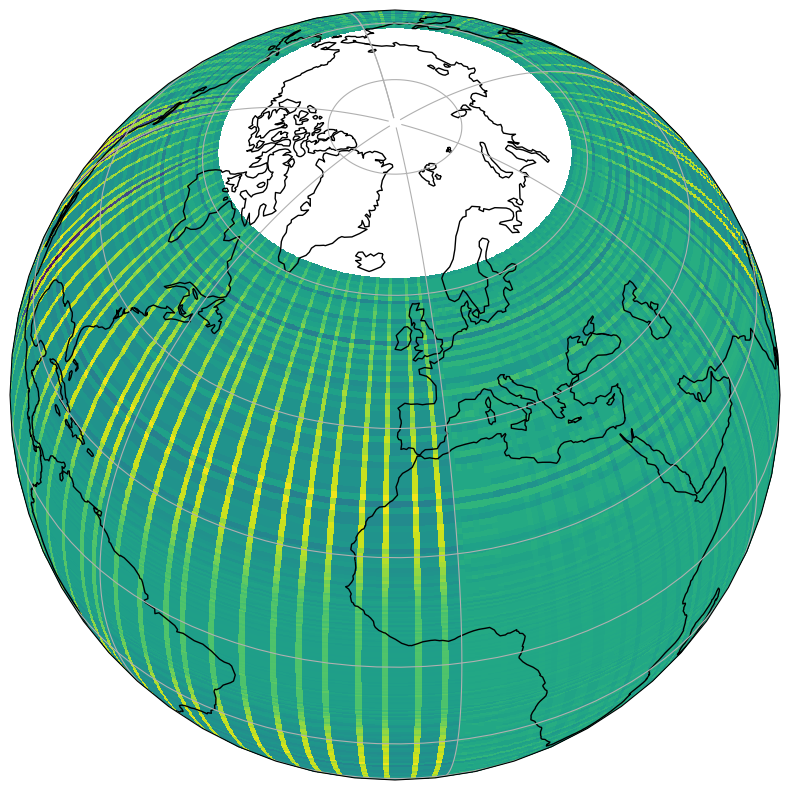

In [149]:
crs = ccrs.Orthographic(-10, 45)


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)



# ax.set_global()
ax.gridlines()
ax.coastlines()

plt.pcolormesh(np.rad2deg(cice_ds.tlon.sel(ny=slice(None,240))), np.rad2deg(cice_ds.tlat.sel(ny=slice(None,240))), anoms.sel(ny=slice(None,240)), transform=ccrs.PlateCarree())

# plt.ylim(50,90)

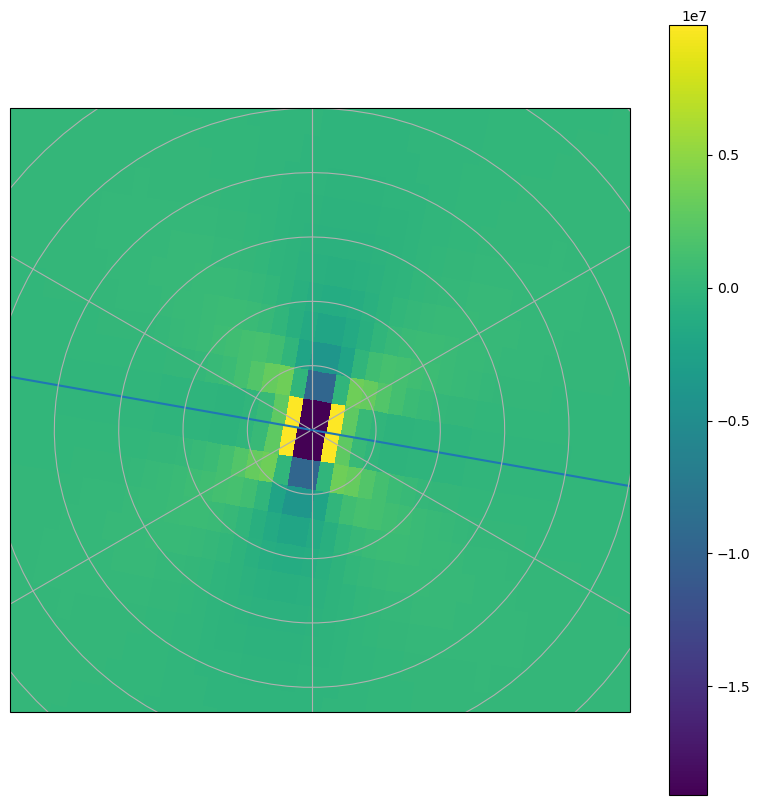

In [192]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)

plt.vlines(-100, -90,90, transform=ccrs.PlateCarree())
plt.vlines(80, -90,90, transform=ccrs.PlateCarree())


# ax.set_global()
ax.gridlines()
ax.coastlines()

plt.pcolormesh(cicexp, ciceyp, anoms, transform=ccrs.PlateCarree())

ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()

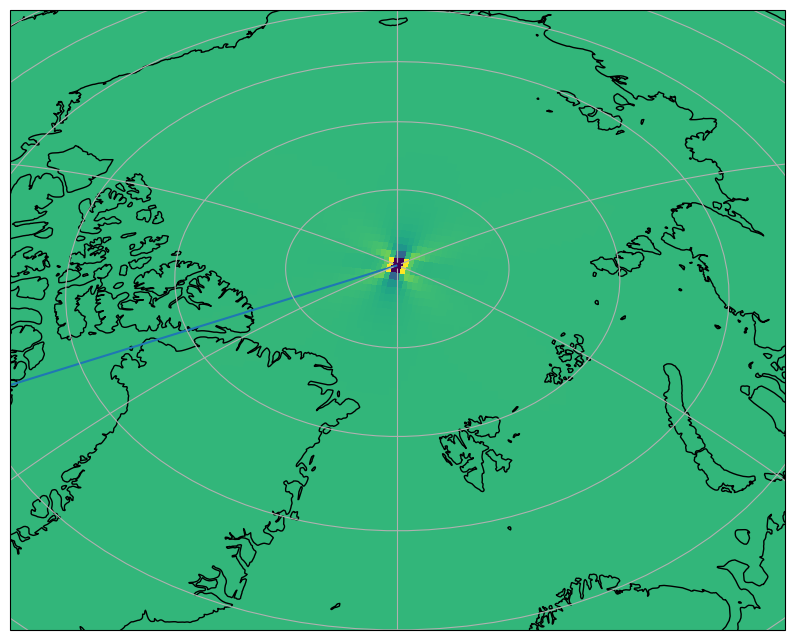

In [183]:
crs = ccrs.Orthographic(0, 45)


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)



# ax.set_global()
ax.gridlines()
ax.coastlines()

plt.pcolormesh(cicexp, ciceyp, anoms, transform=ccrs.PlateCarree())
plt.vlines(-80, -90,90, transform=ccrs.PlateCarree())


# plt.xlim(50,90)?
ax.set_extent((-180,180,70,90), crs=ccrs.PlateCarree())

# plt.colorbar()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


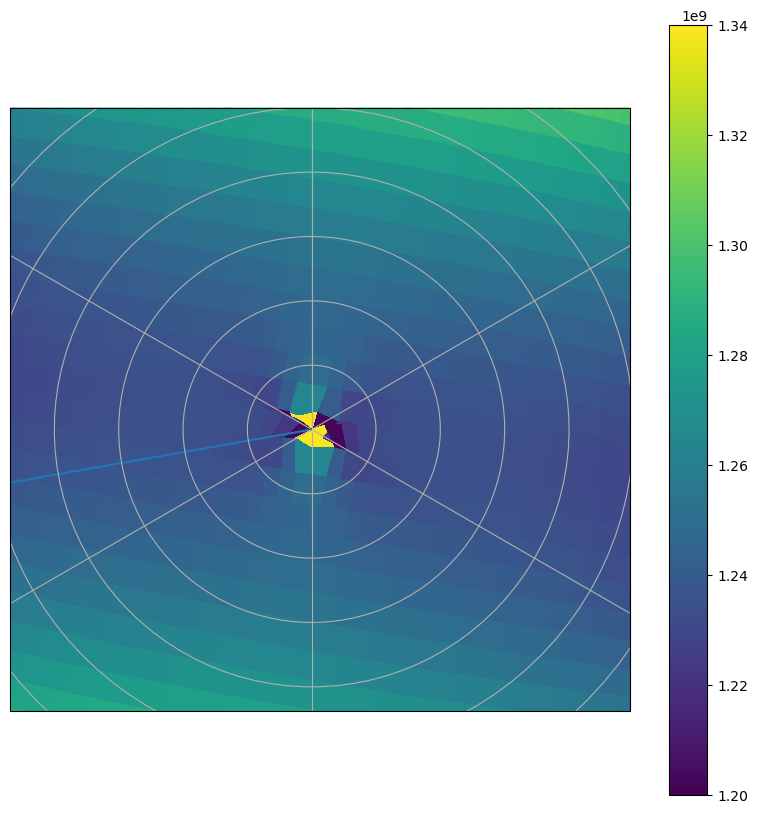

In [184]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(np.rad2deg(cice_ds.ulon), np.rad2deg(cice_ds.ulat), cice_ds.tarea, transform=ccrs.PlateCarree(),vmin=12e8, vmax=13.4e8)

plt.vlines(-80, -90,90, transform=ccrs.PlateCarree())


# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


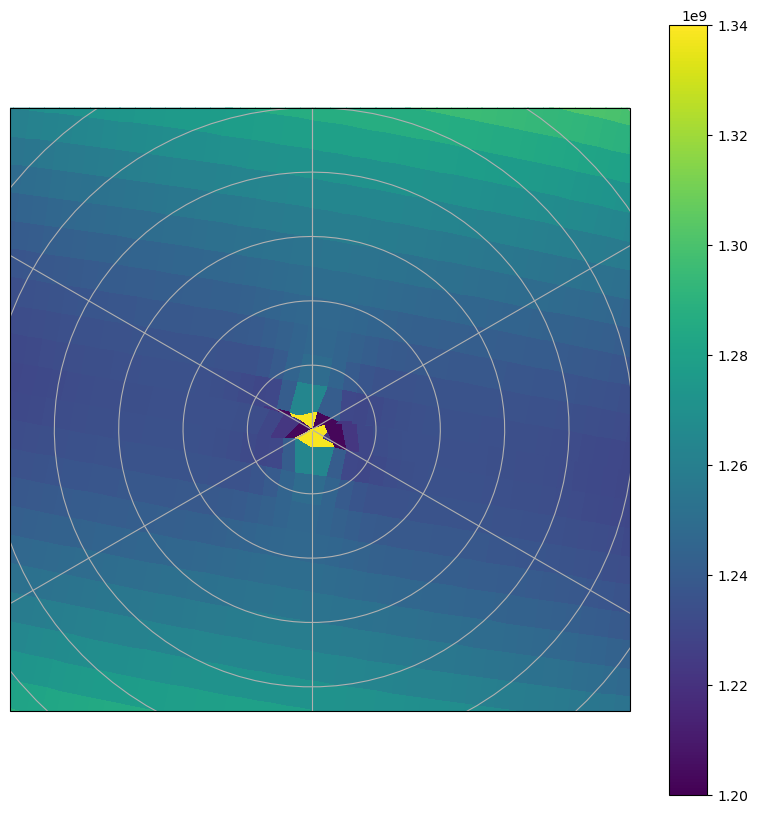

In [162]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(np.rad2deg(cice_ds.ulon), np.rad2deg(cice_ds.ulat), cice_ds.tarea, transform=ccrs.PlateCarree(),vmin=12e8, vmax=13.4e8)

# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

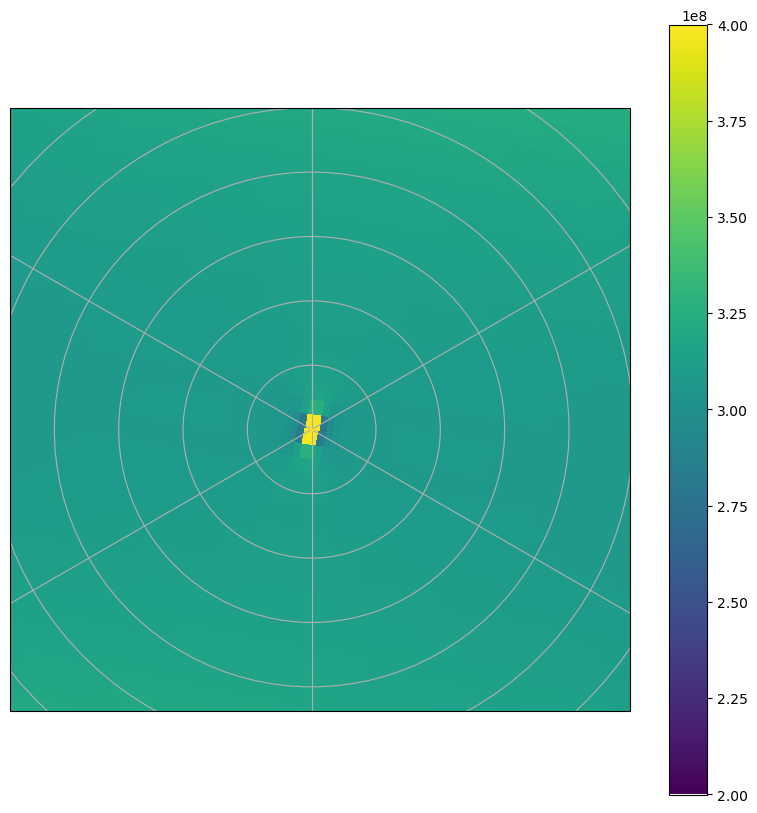

In [153]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(mom_ds.x, mom_ds.y, mom_ds.area, transform=ccrs.PlateCarree(),vmin=2e8, vmax=4e8)

# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

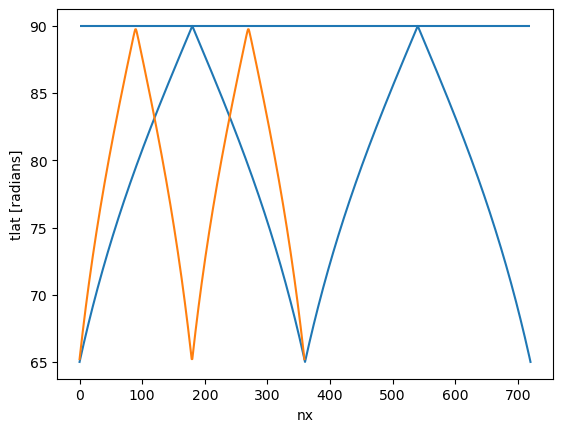

In [167]:
mom_ds.y[-1,:].plot()
np.rad2deg(cice_ds.tlat[-1,:]).plot()
plt.hlines([90], 0, 720)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


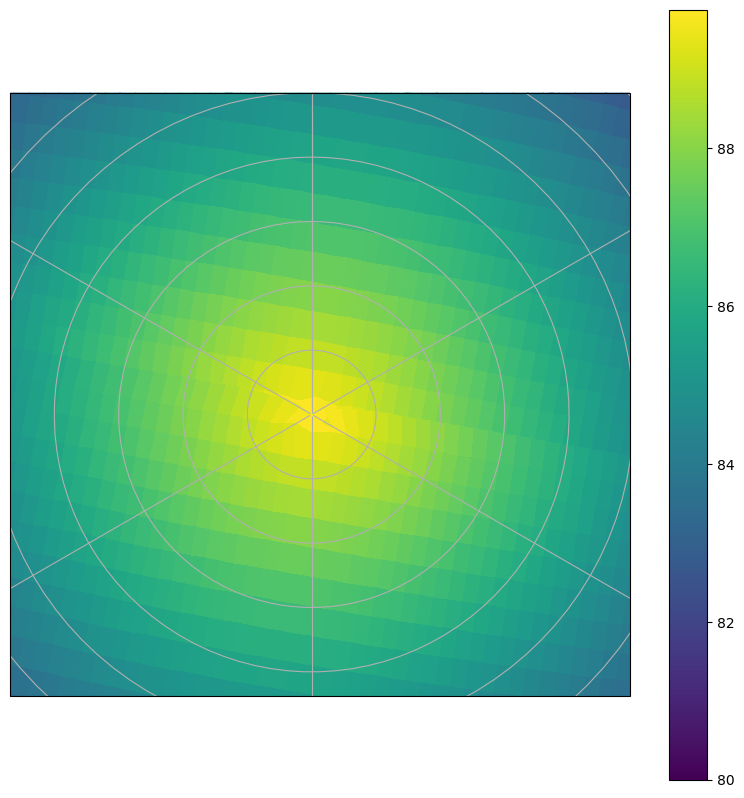

In [163]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(np.rad2deg(cice_ds.ulon), np.rad2deg(cice_ds.ulat), np.rad2deg(cice_ds.tlat), transform=ccrs.PlateCarree(), vmin=80)

# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


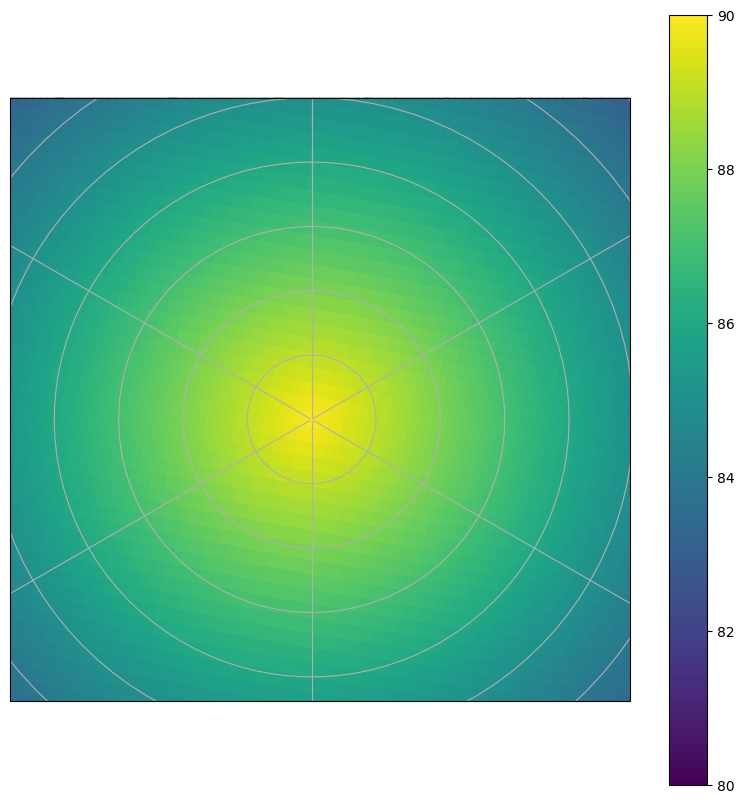

In [155]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(mom_ds.x, mom_ds.y, mom_ds.y, transform=ccrs.PlateCarree(),vmin=80)

# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.10/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1781: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


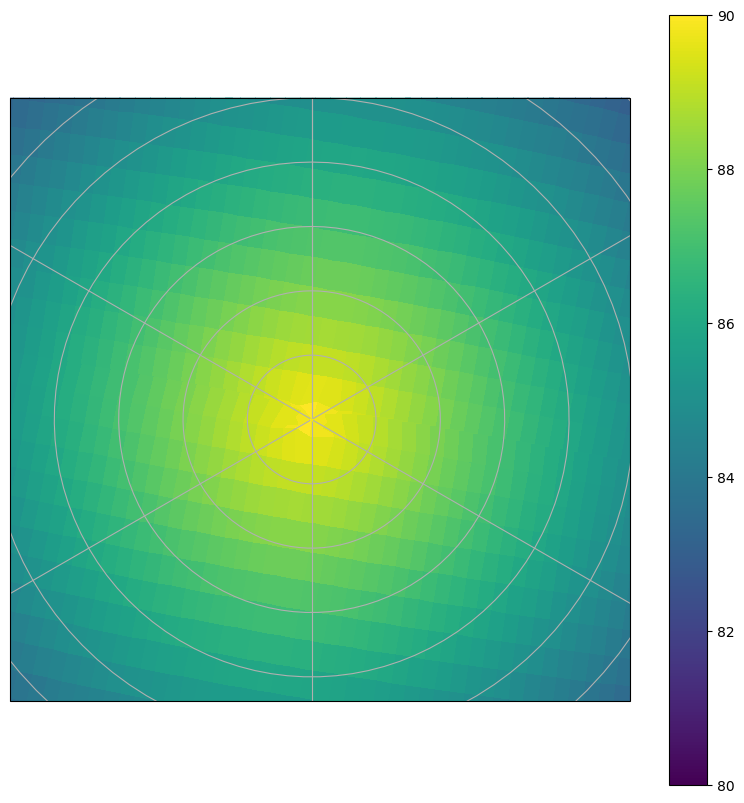

In [156]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(cicexp, ciceyp, ciceyp, transform=ccrs.PlateCarree(), vmin=80)
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()

# plt.xlim(50,90)?

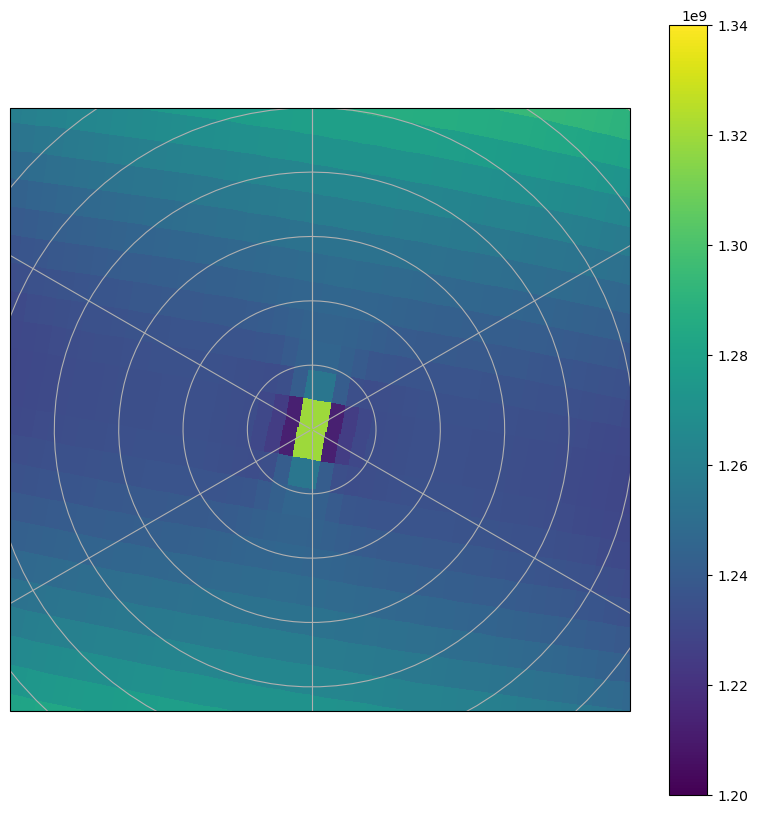

In [157]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(cicexp, ciceyp, tarea, transform=ccrs.PlateCarree(), vmin=12e8, vmax=13.4e8)
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,85,90), crs=ccrs.PlateCarree())

plt.colorbar()

# plt.xlim(50,90)?

In [29]:

cice_ds

<xarray.Dataset>
Dimensions:     (ny: 300, nx: 360, nc: 4)
Dimensions without coordinates: ny, nx, nc
Data variables: (12/16)
    ulat        (ny, nx) float64 ...
    ulon        (ny, nx) float64 ...
    tlat        (ny, nx) float64 ...
    tlon        (ny, nx) float64 ...
    htn         (ny, nx) float64 ...
    hte         (ny, nx) float64 ...
    ...          ...
    tarea       (ny, nx) float64 ...
    uarea       (ny, nx) float64 ...
    lont_bonds  (nc, ny, nx) float64 ...
    latt_bonds  (nc, ny, nx) float64 ...
    lonu_bonds  (nc, ny, nx) float64 ...
    latu_bonds  (nc, ny, nx) float64 ...

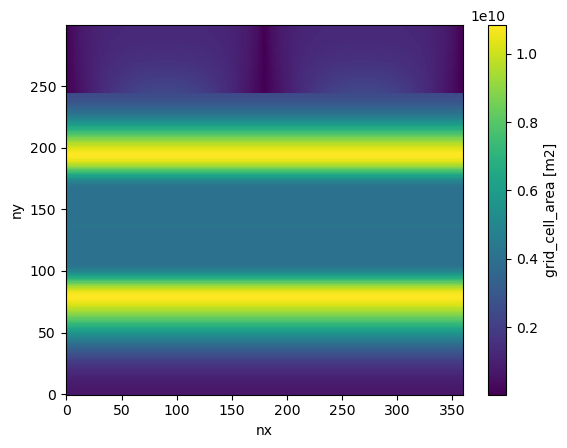

In [110]:
tarea.plot()

In [111]:
cice_ds.tarea.dtype

dtype('float64')

In [112]:
tarea.dtype

dtype('float64')

In [113]:
tarea.units

'm2'

In [114]:
cice_ds.tarea.units

'm^2'

In [115]:
tarea-cice_ds.tarea

<xarray.DataArray (ny: 300, nx: 360)>
array([[ 7.04526901e-05,  7.04526901e-05,  7.04526901e-05, ...,
         0.00000000e+00,  7.04526901e-05,  7.04526901e-05],
       [-1.19209290e-07, -1.19209290e-07, -1.19209290e-07, ...,
        -1.19209290e-07, -1.19209290e-07, -1.19209290e-07],
       [ 1.19209290e-07,  1.19209290e-07,  1.19209290e-07, ...,
         1.19209290e-07,  1.19209290e-07,  1.19209290e-07],
       ...,
       [-2.47219464e+04, -2.40641643e+04, -2.34447661e+04, ...,
        -2.34447661e+04, -2.40641643e+04, -2.47219464e+04],
       [-2.51920304e+04, -2.45179796e+04, -2.38847086e+04, ...,
        -2.38847086e+04, -2.45179795e+04, -2.51920304e+04],
       [-2.54289325e+04, -2.47466618e+04, -2.41063864e+04, ...,
        -2.41063864e+04, -2.47466618e+04, -2.54289325e+04]])
Dimensions without coordinates: ny, nx

If we ignore the tripole for a second:

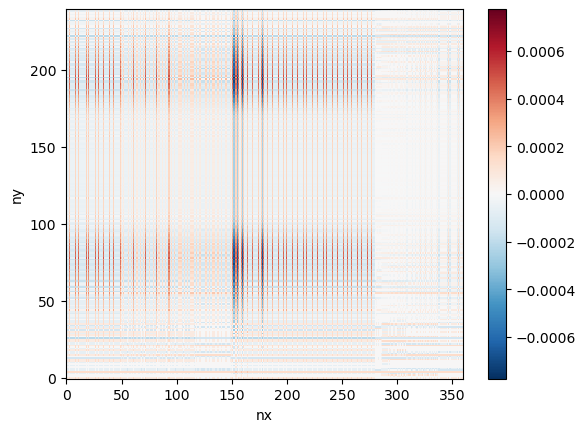

In [132]:
(tarea-cice_ds.tarea).isel(ny=slice(0,240)).plot()

Lets calculate tarea a different way

In [117]:
tarea2 = mom_ds.area[::2,::2]+mom_ds.area[1::2,::2]+mom_ds.area[1::2,1::2]+mom_ds.area[::2,1::2]

In [153]:
tarea[-1,-1]

<xarray.DataArray 'area' ()>
array(38390617.9489371)
Attributes:
    standard_name:  grid_cell_area
    units:          m2

In [154]:
tarea2[-1,-1]

<xarray.DataArray 'area' ()>
array(38390617.94893711)

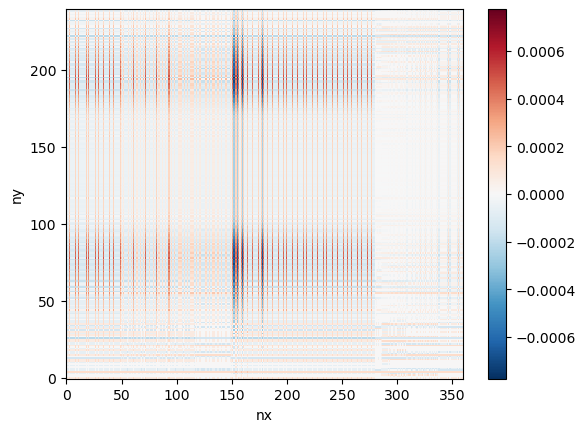

In [133]:
(tarea-cice_ds.tarea).isel(ny=slice(0,240)).plot()

As a fraction

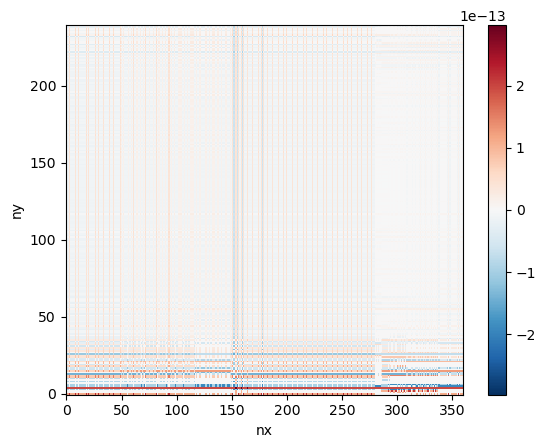

In [158]:
((tarea-cice_ds.tarea)/tarea).isel(ny=slice(0,240)).plot()

(array([12232., 17656.,  7192., 29520.,  6480.,  5760.,  5400.,  5760.,
         6120., 11880.]),
 array([2.10747593e+07, 1.10312409e+09, 2.18517341e+09, 3.26722274e+09,
        4.34927207e+09, 5.43132140e+09, 6.51337072e+09, 7.59542005e+09,
        8.67746938e+09, 9.75951871e+09, 1.08415680e+10]),
 <BarContainer object of 10 artists>)

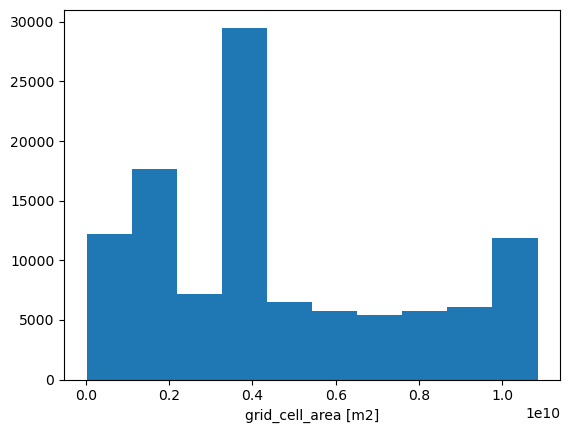

In [150]:
tarea.plot.hist()

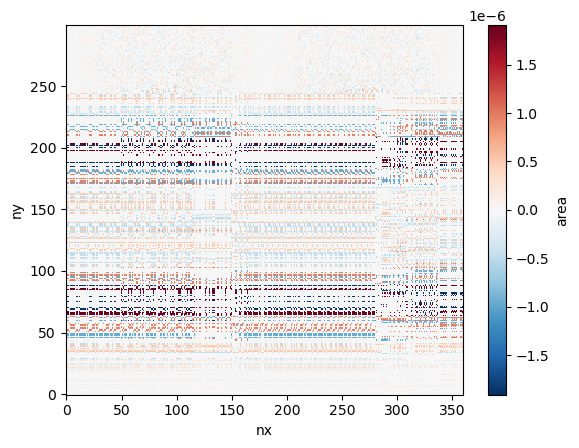

In [134]:
(tarea2-tarea).plot()

I think that is small enough to be rounding / order of operations errors (i.e. its about the 14th sig fig)

# The tripole

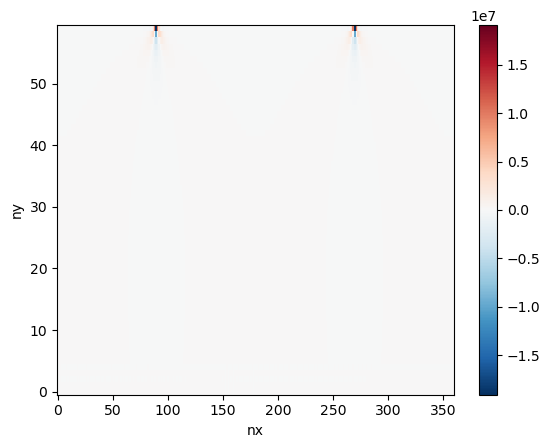

In [218]:
(tarea-cice_ds.tarea).isel(ny=slice(240,300)).plot()

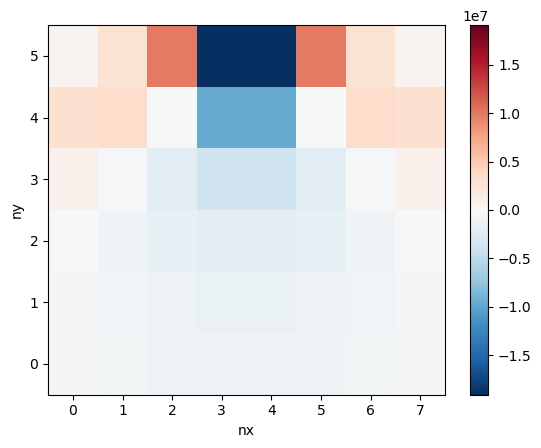

In [236]:
(tarea-cice_ds.tarea).isel(ny=slice(294,300), nx=slice(86,94)).plot()

In [255]:
(tarea-cice_ds.tarea).isel(ny=slice(240,300), nx=slice(0,180)).sum()

<xarray.DataArray ()>
array(0.00487775)

In [254]:
(tarea-cice_ds.tarea).isel(ny=slice(240,300), nx=slice(180,360)).sum()

<xarray.DataArray ()>
array(0.0069931)

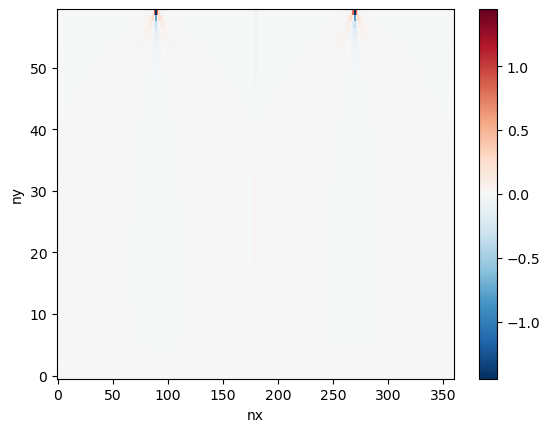

In [266]:
((tarea-cice_ds.tarea)/tarea*100).isel(ny=slice(240,300)).plot()

In [249]:
(tarea-cice_ds.tarea).isel(ny=slice(0,250)).sum()

<xarray.DataArray ()>
array(1193778.46967296)

In [250]:
(tarea-cice_ds.tarea).sum()

<xarray.DataArray ()>
array(-0.02489651)

In [238]:
(tarea-cice_ds.tarea).isel(ny=299, nx=slice(86,94)).values

array([   462409.62934494,   2684143.52138448,   9877771.1061306 ,
       -19085417.98000479, -19085417.9754982 ,   9877771.10838389,
         2684143.52363777,    462409.63272476])

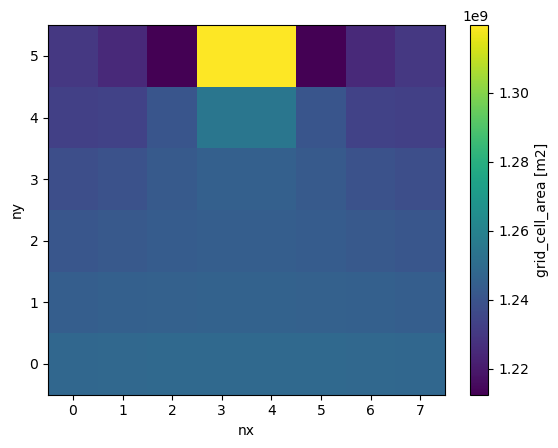

In [239]:
(tarea).isel(ny=slice(294,300), nx=slice(86,94)).plot()

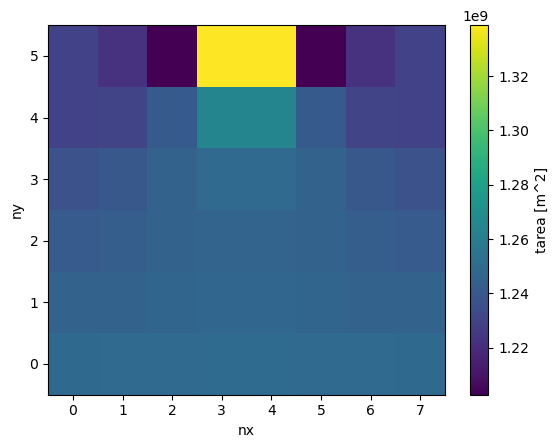

In [240]:
(cice_ds.tarea).isel(ny=slice(294,300), nx=slice(86,94)).plot()

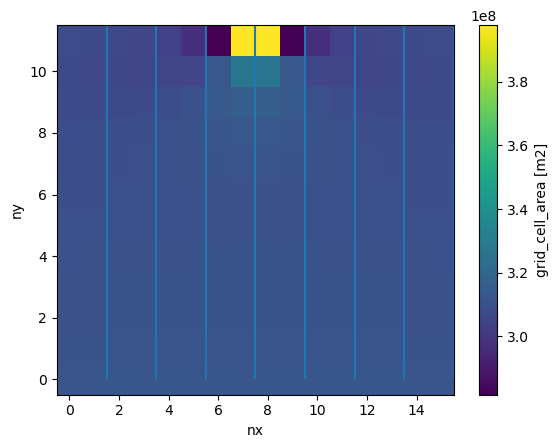

In [241]:
(mom_ds.area).isel(ny=slice(294*2,300*2), nx=slice(86*2,94*2)).plot()
plt.vlines([1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5], 0,12)

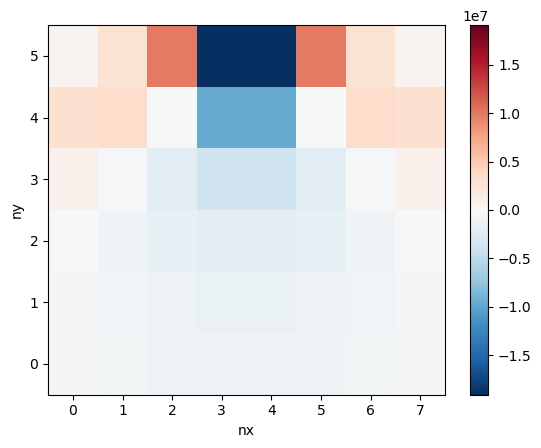

In [245]:
(tarea-cice_ds.tarea).isel(ny=slice(294,300), nx=slice(266,274)).plot()

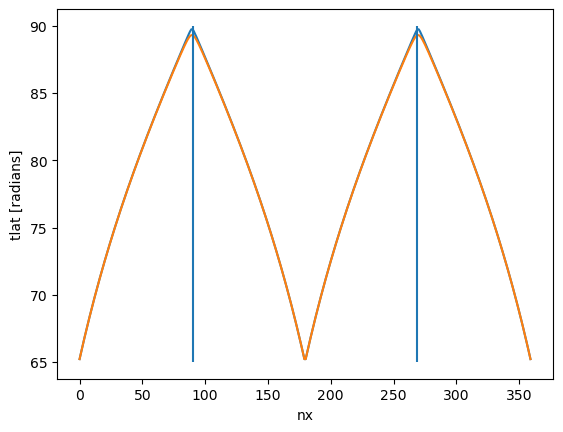

In [196]:
np.rad2deg(cice_ds.tlat.isel(ny=299)).plot()
np.rad2deg(cice_ds.tlat.isel(ny=298)).plot()
plt.vlines([90, 150+119], 65,90)

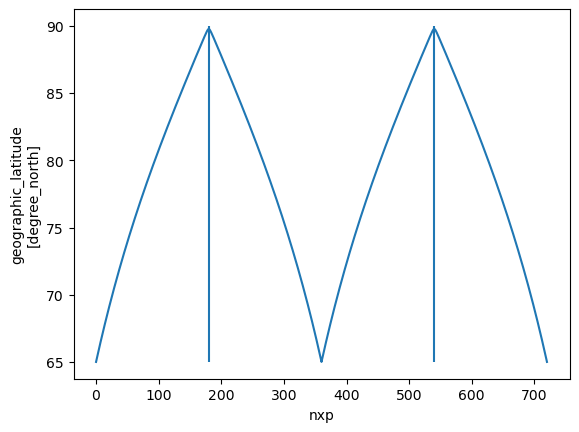

In [202]:
mom_ds.y.isel(nyp=599).plot()
plt.vlines([180, 540], 65,90)

In [198]:
mom_ds.y.isel(nyp=599).argmax()

<xarray.DataArray 'y' ()>
array(180)

In [206]:
mom_ds.y.isel(nyp=599).max()

<xarray.DataArray 'y' ()>
array(89.77447613)

In [209]:
mom_ds.y.isel(nyp=599, nxp=181).max()

<xarray.DataArray 'y' ()>
array(89.74870688)

In [215]:
mom_ds.y.isel(nyp=600, nxp=[179,180,181]).values

array([89.889152, 90.      , 89.889152])

In [216]:
mom_ds.y.isel(nyp=600, nxp=slice(300,720)).argmax()

<xarray.DataArray 'y' ()>
array(240)

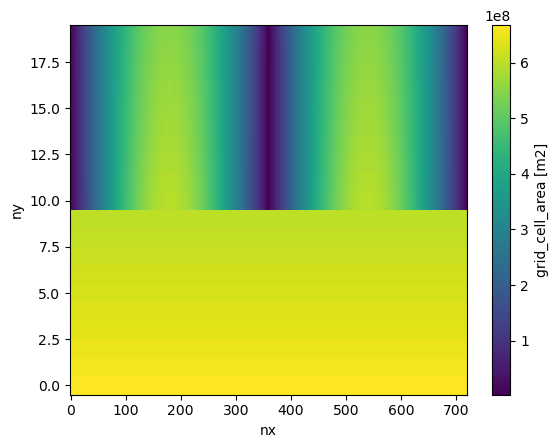

In [10]:
mom_ds.area.isel(ny=slice(480,500)).plot()

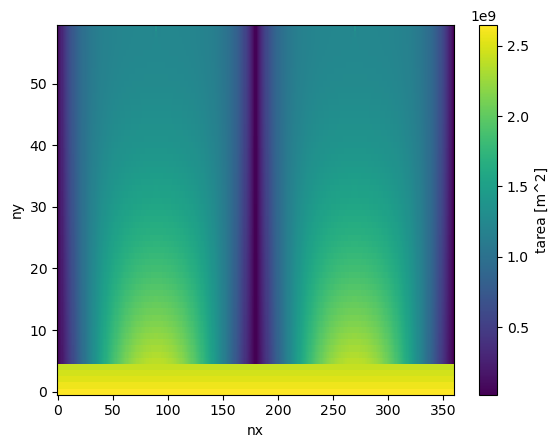

In [164]:
cice_ds.tarea.isel(ny=slice(240,300)).plot()

In [166]:
mom_ds

<xarray.Dataset>
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 1.594e+08 1.594e+08 ... 1.435e+07 4.856e+06

In [126]:
cice_ds

<xarray.Dataset>
Dimensions:     (ny: 300, nx: 360, nc: 4)
Dimensions without coordinates: ny, nx, nc
Data variables: (12/16)
    ulat        (ny, nx) float64 ...
    ulon        (ny, nx) float64 ...
    tlat        (ny, nx) float64 ...
    tlon        (ny, nx) float64 ...
    htn         (ny, nx) float64 ...
    hte         (ny, nx) float64 ...
    ...          ...
    tarea       (ny, nx) float64 ...
    uarea       (ny, nx) float64 6.476e+08 6.476e+08 ... 7.584e+07 1.945e+07
    lont_bonds  (nc, ny, nx) float64 ...
    latt_bonds  (nc, ny, nx) float64 ...
    lonu_bonds  (nc, ny, nx) float64 ...
    latu_bonds  (nc, ny, nx) float64 ...

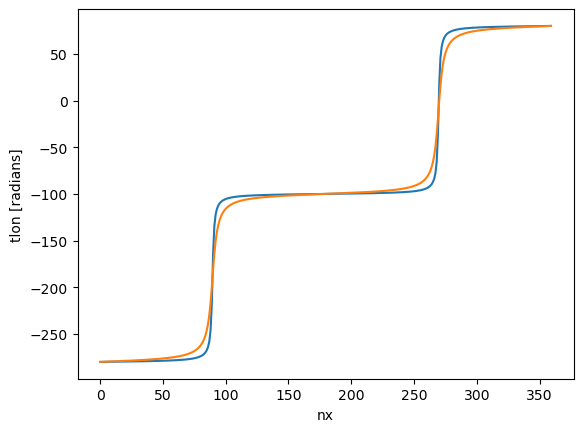

In [135]:
np.rad2deg(cice_ds.tlon.isel(ny=299)).plot()
np.rad2deg(cice_ds.tlon.isel(ny=298)).plot()

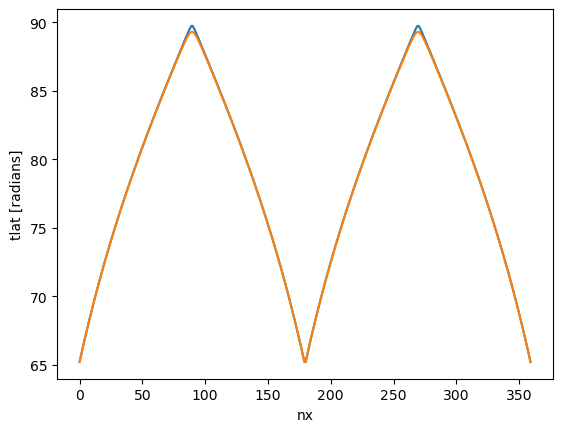

In [136]:
np.rad2deg(cice_ds.tlat.isel(ny=299)).plot()
np.rad2deg(cice_ds.tlat.isel(ny=298)).plot()

In [146]:
cice_ds.tlat.isel(ny=299).argmax()

<xarray.DataArray 'tlat' ()>
array(89)

In [204]:
np.rad2deg(cice_ds.tlat.isel(ny=299).max())

<xarray.DataArray 'tlat' ()>
array(89.74870619)

In [207]:
np.rad2deg(cice_ds.tlat.isel(ny=299, nx=90).max())

<xarray.DataArray 'tlat' ()>
array(89.74870619)

In [145]:
cice_ds.tlat.isel(ny=299, nx=slice(150,360)).argmax()

<xarray.DataArray 'tlat' ()>
array(119)

In [205]:
np.rad2deg(cice_ds.tlat.isel(ny=299, nx=slice(150,360)).max())

<xarray.DataArray 'tlat' ()>
array(89.74870619)

# and uarea

In [11]:
uarea = mom_ds.area.isel(nx=[*np.arange(1,720),0], ny=[*np.arange(1,600),0]).coarsen(nx=2, ny=2).sum()

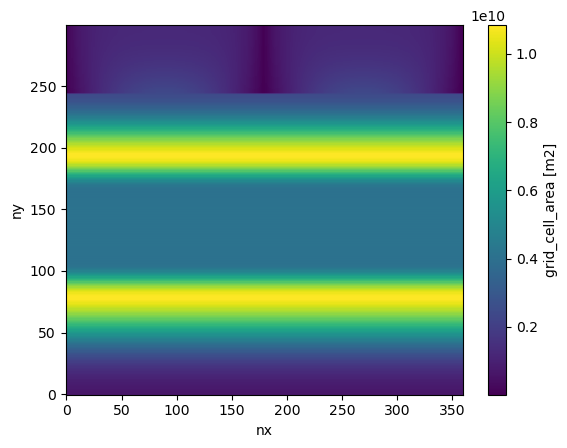

In [12]:
uarea.plot()

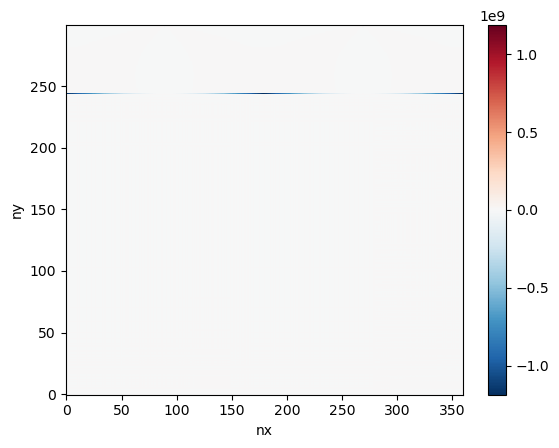

In [16]:
(uarea-cice_ds.uarea).plot()

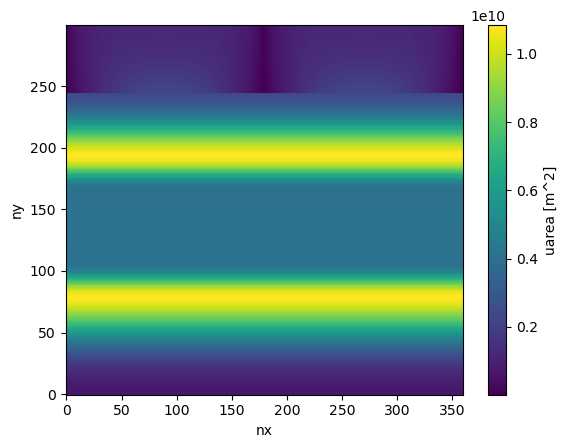

In [18]:
cice_ds.uarea.plot()

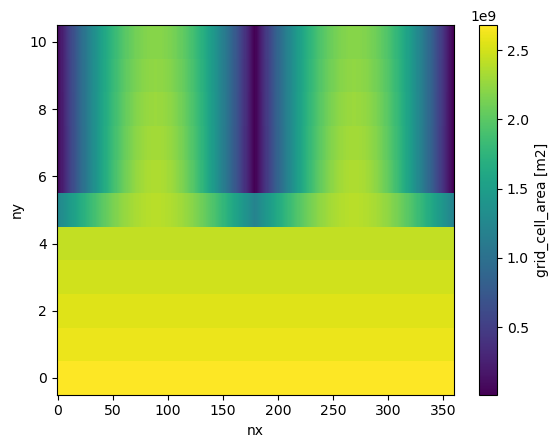

In [22]:
uarea.isel(ny=np.arange(239,250)).plot()

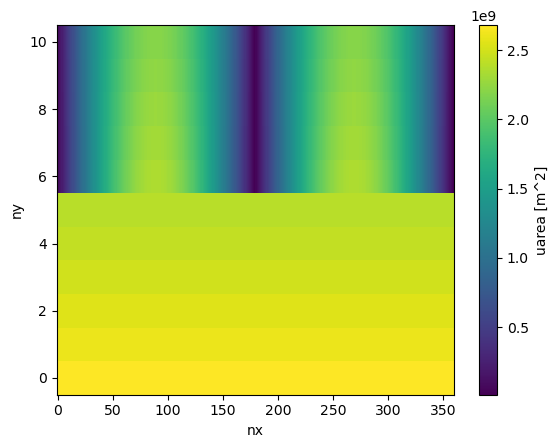

In [21]:
cice_ds.uarea.isel(ny=np.arange(239,250)).plot()

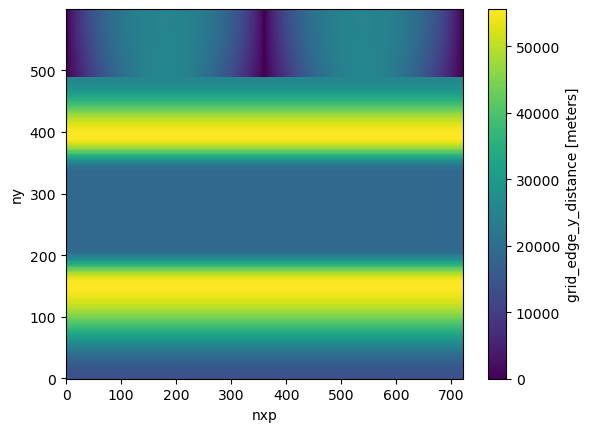

In [251]:
mom_ds.dy.plot()

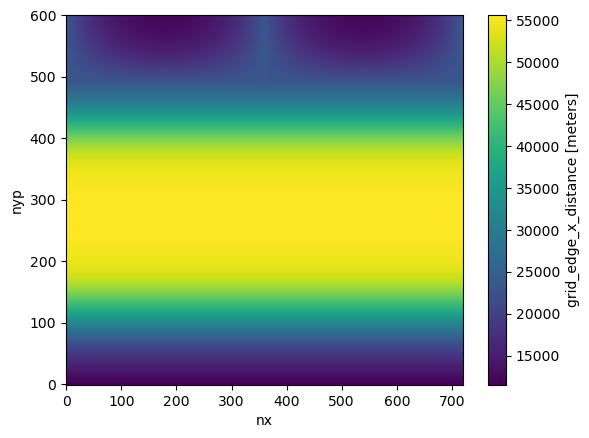

In [252]:
mom_ds.dx.plot()

In [255]:
mom_ds.y[:,0].values

array([-7.80000000e+01, -7.78766234e+01, -7.77531684e+01, -7.76297134e+01,
       -7.75057101e+01, -7.73817067e+01, -7.72569993e+01, -7.71322919e+01,
       -7.70064126e+01, -7.68805333e+01, -7.67533294e+01, -7.66261255e+01,
       -7.64971334e+01, -7.63681413e+01, -7.62372135e+01, -7.61062857e+01,
       -7.59729648e+01, -7.58396438e+01, -7.57037894e+01, -7.55679350e+01,
       -7.54290979e+01, -7.52902608e+01, -7.51483100e+01, -7.50063591e+01,
       -7.48608553e+01, -7.47153516e+01, -7.45661749e+01, -7.44169983e+01,
       -7.42637216e+01, -7.41104450e+01, -7.39529613e+01, -7.37954777e+01,
       -7.36333737e+01, -7.34712697e+01, -7.33044531e+01, -7.31376365e+01,
       -7.29657094e+01, -7.27937823e+01, -7.26166689e+01, -7.24395555e+01,
       -7.22568751e+01, -7.20741946e+01, -7.18858891e+01, -7.16975835e+01,
       -7.15032909e+01, -7.13089982e+01, -7.11086798e+01, -7.09083613e+01,
       -7.07016750e+01, -7.04949886e+01, -7.02819163e+01, -7.00688440e+01,
       -6.98490649e+01, -

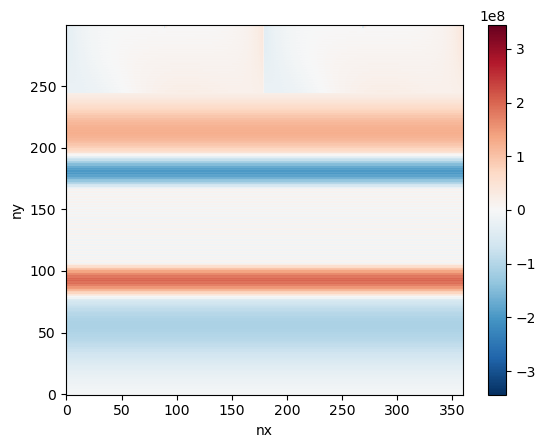

In [197]:
(cice_ds.tarea-cice_ds.uarea).plot()

# From regional tools

In [198]:
from shapely.geometry import Polygon

In [211]:
mom_ds[['x','y']].sel(nxp=0,nyp=0)

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    x        float64 -280.0
    y        float64 -78.0
Data variables:
    *empty*

In [213]:
Polygon([
    (mom_ds.x[0,0], mom_ds.y[0,0]),
    (mom_ds.x[0,1], mom_ds.y[0,1]),
    (mom_ds.x[1,1], mom_ds.y[1,1]),
    (mom_ds.x[1,0], mom_ds.y[1,0]),
]).area

0.06168831168831446

In [215]:
mom_ds.area[0,0]

<xarray.DataArray 'area' ()>
array(1.593844e+08)
Attributes:
    standard_name:  grid_cell_area
    units:          m2

In [226]:
from __future__ import division

import json
from math import pi, sin

__version__ = '1.1.1'
WGS84_RADIUS = 6378137


def rad(value):
    return value * pi / 180


def ring__area(coordinates):
    """
    Calculate the approximate _area of the polygon were it projected onto
        the earth.  Note that this _area will be positive if ring is oriented
        clockwise, otherwise it will be negative.

    Reference:
        Robert. G. Chamberlain and William H. Duquette, "Some Algorithms for
        Polygons on a Sphere", JPL Publication 07-03, Jet Propulsion
        Laboratory, Pasadena, CA, June 2007 http://trs-new.jpl.nasa.gov/dspace/handle/2014/40409

    @Returns

    {float} The approximate signed geodesic _area of the polygon in square meters.
    """

    assert isinstance(coordinates, (list, tuple))

    _area = 0
    coordinates_length = len(coordinates)

    if coordinates_length > 2:
        for i in range(0, coordinates_length):
            if i == (coordinates_length - 2):
                lower_index = coordinates_length - 2
                middle_index = coordinates_length - 1
                upper_index = 0
            elif i == (coordinates_length - 1):
                lower_index = coordinates_length - 1
                middle_index = 0
                upper_index = 1
            else:
                lower_index = i
                middle_index = i + 1
                upper_index = i + 2

            p1 = coordinates[lower_index]
            p2 = coordinates[middle_index]
            p3 = coordinates[upper_index]

            _area += (rad(p3[0]) - rad(p1[0])) * sin(rad(p2[1]))

        _area = _area * WGS84_RADIUS * WGS84_RADIUS / 2

    return _area


def polygon__area(coordinates):

    assert isinstance(coordinates, (list, tuple))

    _area = 0
    if len(coordinates) > 0:
        _area += abs(ring__area(coordinates[0]))

        for i in range(1, len(coordinates)):
            _area -= abs(ring__area(coordinates[i]))

    return _area


def area(geometry):

    if isinstance(geometry, str):
        geometry = json.loads(geometry)

    assert isinstance(geometry, dict)

    _area = 0

    if geometry['type'] == 'Polygon':
        return polygon__area(geometry['coordinates'])
    elif geometry['type'] == 'MultiPolygon':
        for i in range(0, len(geometry['coordinates'])):
            _area += polygon__area(geometry['coordinates'][i])

    elif geometry['type'] == 'GeometryCollection':
        for i in range(0, len(geometry['geometries'])):
            _area += area(geometry['geometries'][i])

    return _area

In [247]:
obj = {'type':'Polygon','coordinates':[[
    [-280, -78],
    [-279.5, -78],
    [-279.5, -77.5],
    [-280, -77.5],
]]}


In [248]:
obj

{'type': 'Polygon',
 'coordinates': [[[-280, -78], [-279.5, -78], [-279.5, -77.5], [-280, -77.5]]]}

In [249]:
area(obj)-mom_ds.area[0,0]

<xarray.DataArray 'area' ()>
array(4.97941528e+08)

In [250]:
area(obj)

657325882.4810117

In [257]:
import gridtools

ModuleNotFoundError: No module named 'gridtools'

(<Figure size 640x480 with 10 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

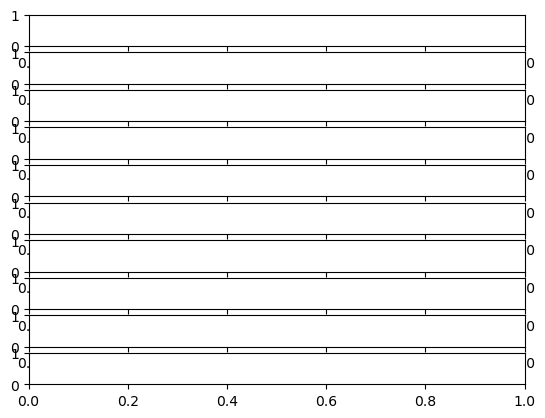

In [33]:
plt.subplots(10)

In [258]:
ls

cice/  mom/  share/  ww3/


In [259]:
ls share/

access-om2-1deg-ESMFmesh.nc  access-om2-1deg-nomask-ESMFmesh.nc  topog.nc


In [260]:
ls cice/

grid.nc*  iced.1900-01-01-10800.nc  kmt.nc*


In [262]:
ls /g/data/ik11/inputs/access-om2/input_eee21b65/cice_025deg

grid.nc*  i2o.nc*  kmt.nc*  mice.nc*  monthly_sstsss.nc*  o2i.nc*  u_star.nc*


In [264]:
ls /g/data/ik11/inputs/access-om2/input_eee21b65/mom_025deg/

calving.nc*            ocean_hgrid.nc*           roughness_cdbot.nc*
chl.nc*                ocean_mask.nc*            roughness_length.nc*
grid_spec.nc*          ocean_mask_table@         salt_sfc_restore.nc*
land_mask.nc*          ocean_mosaic.nc*          sst_ice_clim.nc*
mask_table.465.48x40*  ocean_temp_salt.res.nc*   tideamp.nc*
ncar_precip.nc*        ocean_vgrid.nc*           topog.nc*
ncar_rad.nc*           river_destination_field*
ncar_rescale.nc*       roughness_amp.nc*


In [2]:
ice_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/cice_025deg/grid.nc')

0.3.0


In [3]:
mom_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/mom_025deg/ocean_hgrid.nc')

In [4]:
tarea = mom_grid.area.coarsen(ny=2, nx=2).sum()

In [5]:
tarea

<xarray.DataArray 'area' (ny: 1080, nx: 1440)>
array([[56415065.87160671, 56415065.87160671, 56415065.87160671, ...,
        56415065.87160671, 56415065.87160671, 56415065.87160671],
       [56415065.87160671, 56415065.87160671, 56415065.87160671, ...,
        56415065.87160671, 56415065.87160671, 56415065.87160671],
       [56415065.87160671, 56415065.87160671, 56415065.87160671, ...,
        56415065.87160671, 56415065.87160671, 56415065.87160671],
       ...,
       [  571252.36985016,  1701612.84480965,  2814262.03267578, ...,
         2814262.03268459,  1701612.84480621,   571252.36985538],
       [  571289.04520782,  1701722.28308504,  2814438.68070783, ...,
         2814438.68071085,  1701722.28308779,   571289.04520246],
       [  570866.81511307,  1700460.79276231,  2812349.25660615, ...,
         2812349.2566012 ,  1700460.79275873,   570866.81510427]])
Dimensions without coordinates: ny, nx
Attributes:
    standard_name:  grid_cell_area
    units:          m2

In [15]:
mom_grid.x[::2,::2]

<xarray.DataArray 'x' (nyp: 1081, nxp: 1441)>
[1557721 values with dtype=float64]
Dimensions without coordinates: nyp, nxp
Attributes:
    standard_name:  geographic_longitude
    units:          degree_east

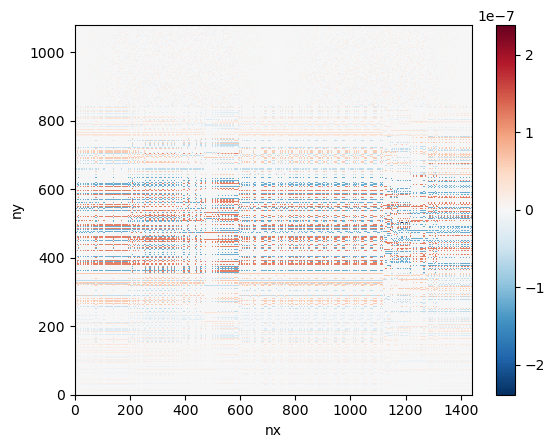

In [16]:
(tarea-ice_grid.tarea).plot()

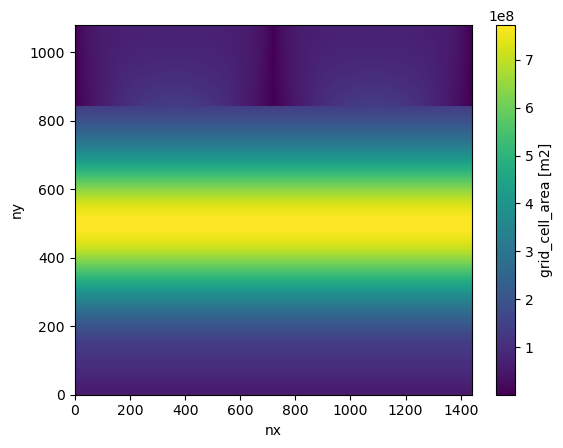

In [29]:
tarea.plot()

In [17]:
mom_grid

<xarray.Dataset>
Dimensions:   (nyp: 2161, nxp: 2881, nx: 2880, ny: 2160)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 1.41e+07 1.41e+07 1.41e+07 ... 2.137e+05 7.15e+04

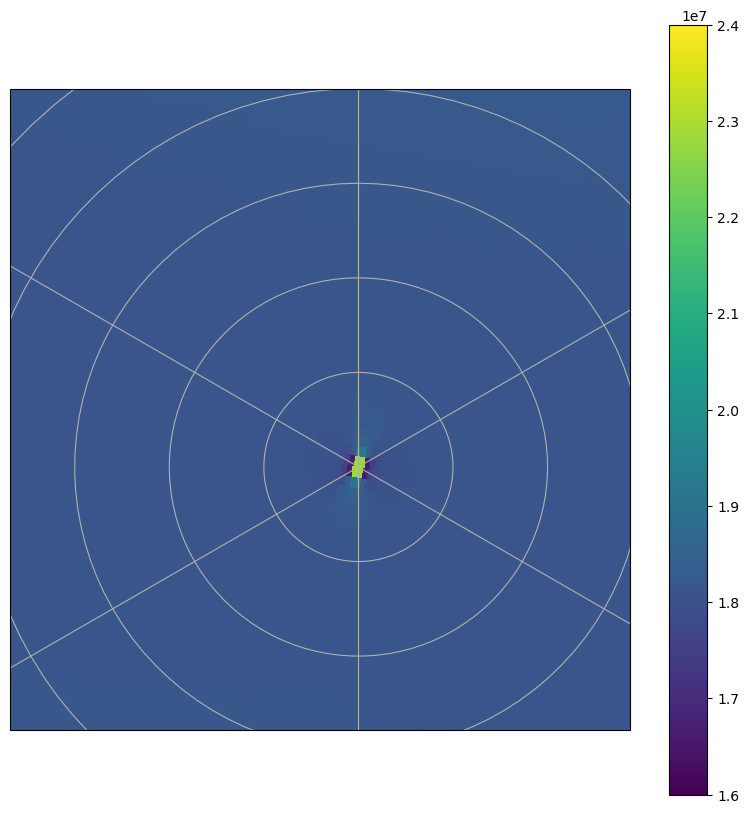

In [30]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(mom_grid.x, mom_grid.y, mom_grid.area, transform=ccrs.PlateCarree(), vmin=1.6e7,vmax=2.4e7)

# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,88,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

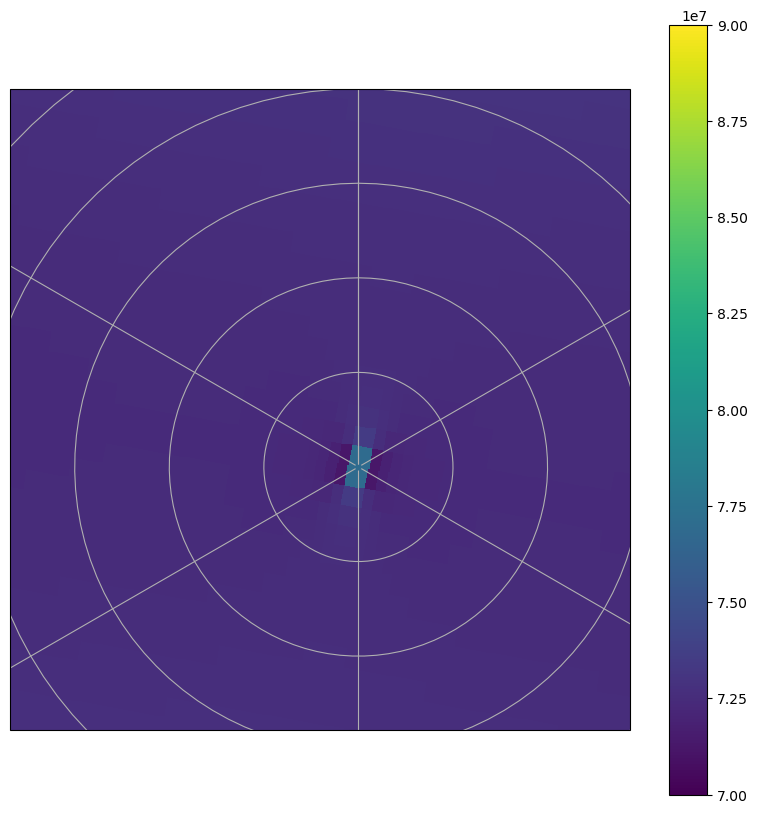

In [31]:
crs = ccrs.NorthPolarStereo()


plt.figure(figsize=(10,10))
ax = plt.axes(projection=crs)


# ax.set_global()
ax.gridlines()
# ax.coastlines()

plt.pcolormesh(mom_grid.x[::2,::2], mom_grid.y[::2,::2], tarea, transform=ccrs.PlateCarree(), vmin=7e7,vmax=9e7)

# plt.pcolormesh(np.rad2deg(cice_ds.tlon), np.rad2deg(cice_ds.tlat), cice_ds.tarea, transform=ccrs.PlateCarree())
# plt.vlines(np.arange(-180,180), -90,90, transform=ccrs.PlateCarree())


ax.set_extent((-180,180,88,90), crs=ccrs.PlateCarree())

plt.colorbar()
# plt.xlim(50,90)?

In [19]:

#wrap lons
uarea= mom_grid.area.isel(
    ny=[*np.arange(1,len(mom_grid.area.ny)),0],
    nx=[*np.arange(1,len(mom_grid.area.nx)),0]
).coarsen(ny=2, nx=2).sum()

In [20]:
top_row_a = mom_grid.area.isel(ny=-1).coarsen(nx=2).sum()

In [21]:
uarea.loc[{'ny':1079}]=top_row_a+top_row_a.isel(nx=np.arange(len(top_row_a)-1,-1,-1))

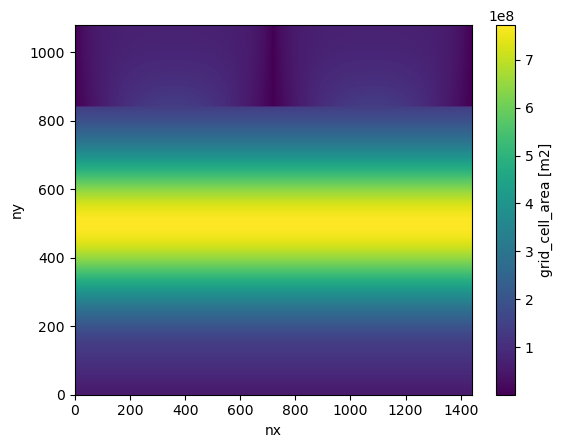

In [22]:
uarea.plot()

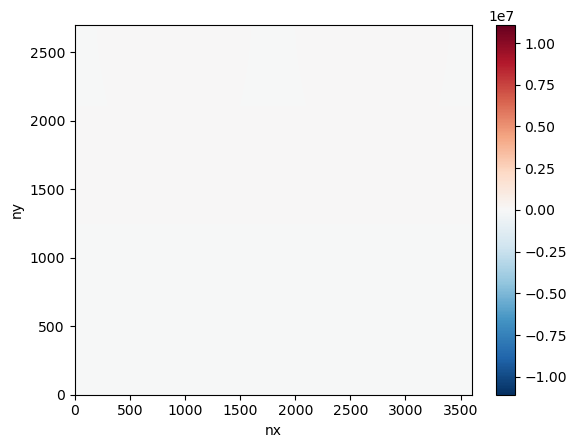

In [66]:
(ice_grid.uarea-uarea).plot()

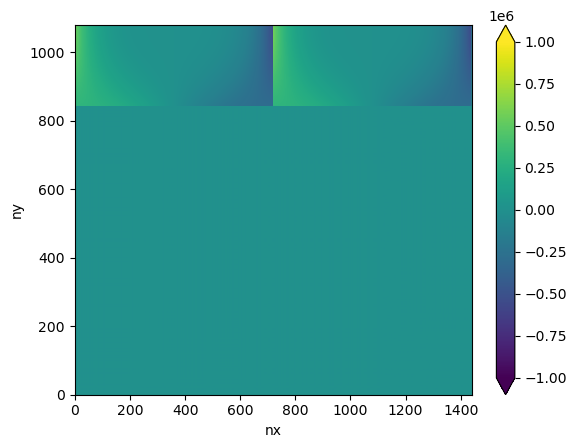

In [26]:
(ice_grid.uarea-ice_grid.tarea).plot(vmin=-1e6, vmax=1e6)

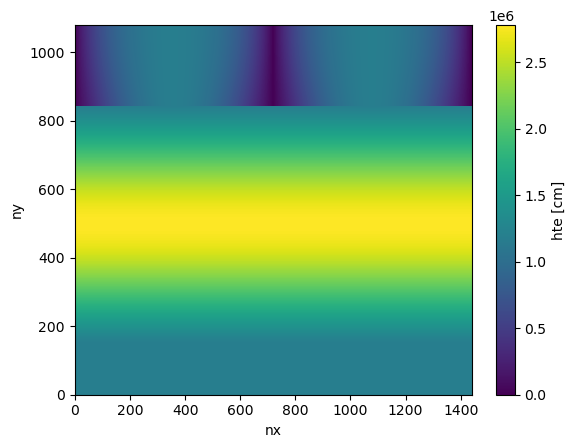

In [33]:
ice_grid.hte.plot()

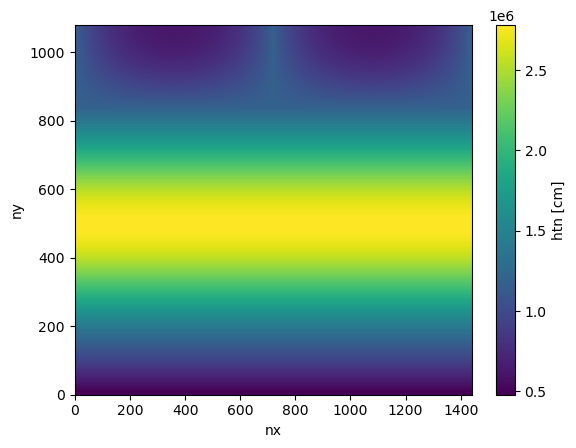

In [34]:
ice_grid.htn.plot()

In [66]:
np.rad2deg(ice_grid['ulat'][0:2,0:2].values)

array([[-81.02420154, -81.02420154],
       [-80.91860295, -80.91860295]])

In [67]:
np.rad2deg(ice_grid['ulon'][0:2,0:2].values)

array([[-280.  , -279.75],
       [-280.  , -279.75]])

In [70]:
lon0=np.rad2deg(ice_grid['ulon'][0,0].values)

In [71]:
lon1=np.rad2deg(ice_grid['ulon'][1,1].values)

In [72]:
lat0=np.rad2deg(ice_grid['ulat'][0,0].values)

In [73]:
lat1=np.rad2deg(ice_grid['ulat'][1,1].values)

In [78]:
from pyproj import Geod

from shapely.geometry import LineString, Point, Polygon

geod = Geod(ellps="WGS84")

poly_area, poly_perimeter = geod.geometry_area_perimeter(

    Polygon(

        LineString([

            Point(lon0, lat0), Point(lon1, lat0), Point(lon1, lat1), Point(lon0, lat1)

        ]),

    )

)

poly_area

51666728.63708496

In [79]:
ice_grid.tarea[0,0].values

array(56415065.87160671)

In [1]:
import xarray as xr

In [2]:
ice_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/cice_1deg/grid.nc')

0.3.0


In [2]:
mom_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/mom_1deg/ocean_hgrid.nc')

0.3.0


In [3]:
mom_grid

<xarray.Dataset>
Dimensions:   (nyp: 601, nxp: 721, nx: 720, ny: 600)
Dimensions without coordinates: nyp, nxp, nx, ny
Data variables:
    tile      |S255 ...
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    area      (ny, nx) float64 ...

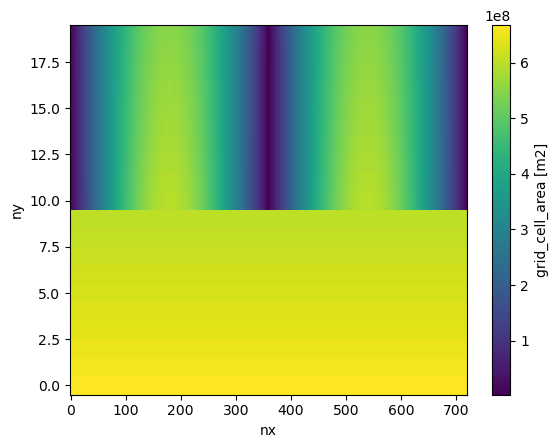

In [6]:
mom_grid.sel(ny=slice(480,500)).area.plot()

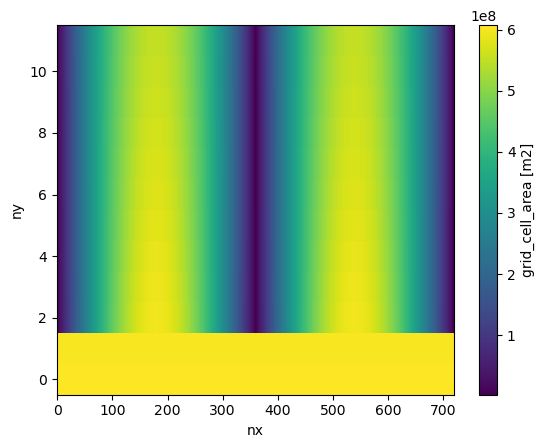

In [9]:
mom_grid.sel(ny=slice(488,500)).area.plot()

In [10]:
mom_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/mom_025deg/ocean_hgrid.nc')

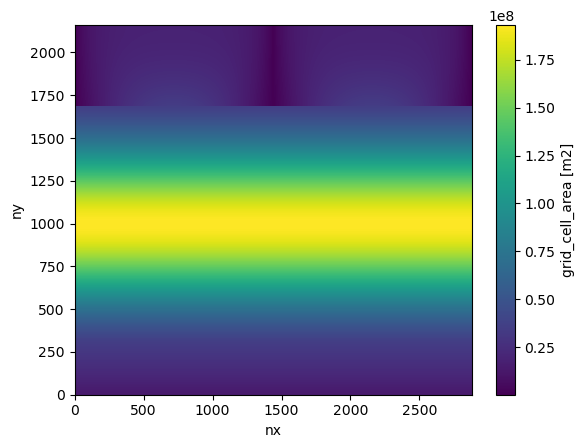

In [11]:
mom_grid.area.plot()

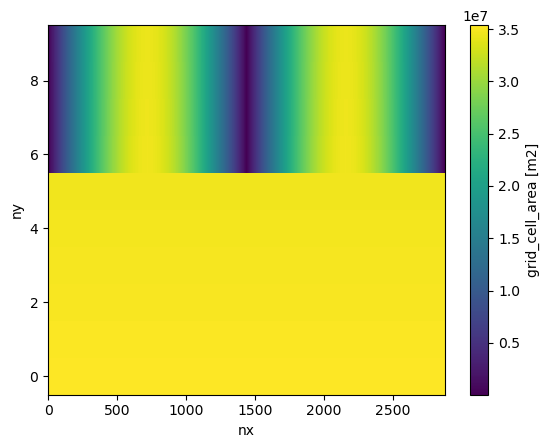

In [14]:
mom_grid.area.sel(ny=slice(1680,1690)).plot()

In [23]:
ice_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/cice_01deg/grid.nc')

In [24]:
mom_grid = xr.open_dataset('/g/data/ik11/inputs/access-om2/input_eee21b65/mom_01deg/ocean_hgrid.nc')

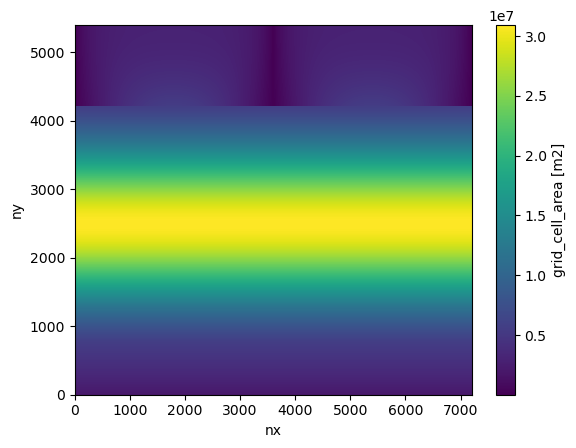

In [25]:
mom_grid.area.plot()

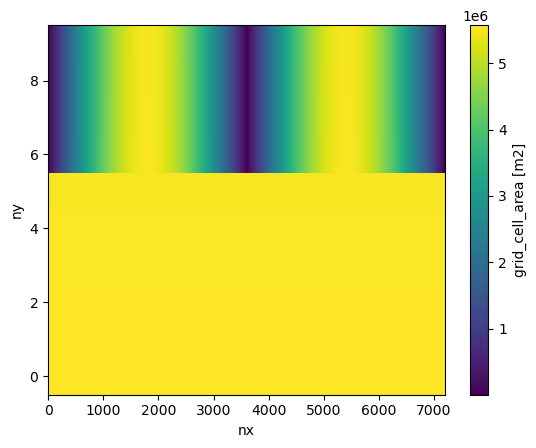

In [26]:
mom_grid.area.sel(ny=slice(4210,4220)).plot()

In [8]:
ice_grid

<xarray.Dataset>
Dimensions:  (ny: 2700, nx: 3600, nc: 4)
Dimensions without coordinates: ny, nx, nc
Data variables: (12/14)
    ulat     (ny, nx) float64 ...
    ulon     (ny, nx) float64 ...
    tlat     (ny, nx) float64 ...
    tlon     (ny, nx) float64 ...
    clon_t   (nc, ny, nx) float64 ...
    clat_t   (nc, ny, nx) float64 ...
    ...       ...
    htn      (ny, nx) float64 ...
    hte      (ny, nx) float64 ...
    angle    (ny, nx) float64 ...
    angleT   (ny, nx) float64 ...
    tarea    (ny, nx) float64 ...
    uarea    (ny, nx) float64 ...

In [27]:

#wrap lons
uarea= mom_grid.area.isel(
    ny=[*np.arange(1,len(mom_grid.area.ny)),0],
    nx=[*np.arange(1,len(mom_grid.area.nx)),0]
).coarsen(ny=2, nx=2).sum()

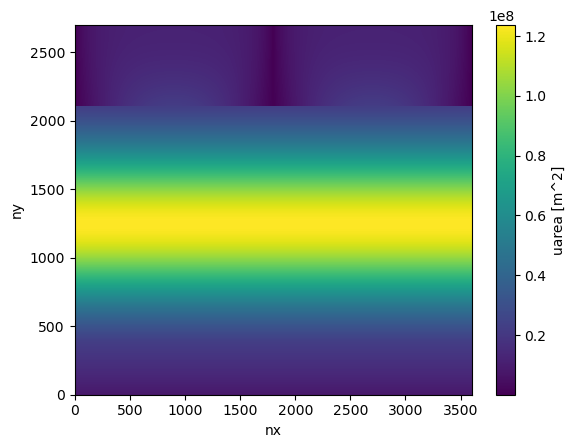

In [28]:
ice_grid.uarea.plot()

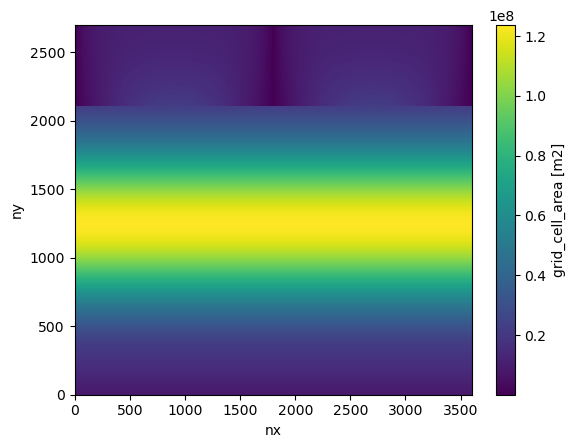

In [29]:
uarea.plot()

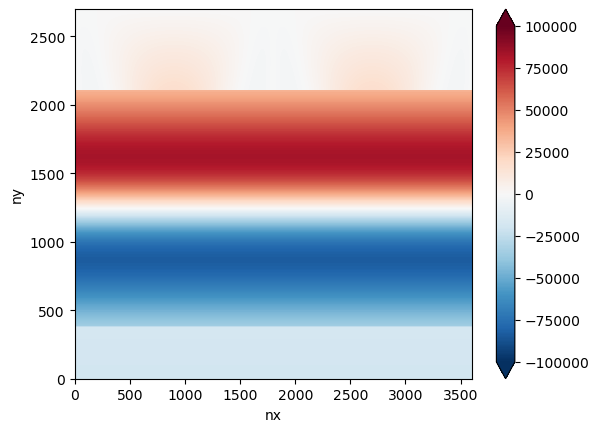

In [31]:
(ice_grid.uarea-uarea).plot(vmax=1e5)

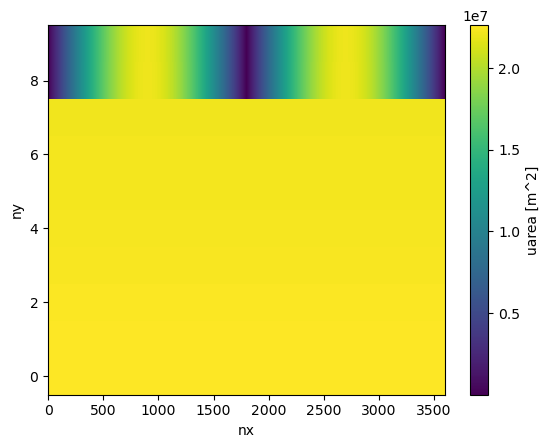

In [12]:
ice_grid.uarea.sel(ny=slice(2100,2110)).plot()

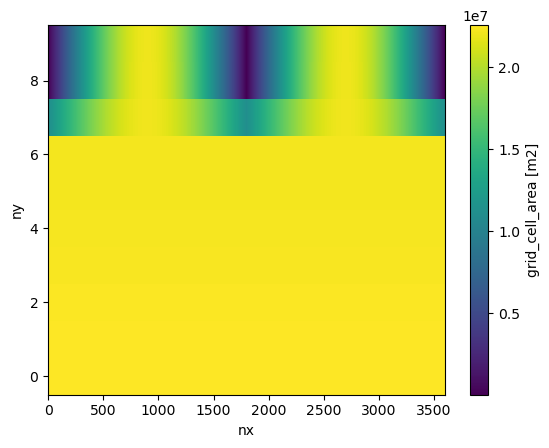

In [13]:
uarea.sel(ny=slice(2100,2110)).plot()

In [7]:
area = mom_grid.area

area_ext = np.append(area[:], area[:, 0:1], axis=1)
area_ext = np.append(area_ext[:], area_ext[-1:, :], axis=0)

area_u = area_ext[1::2, 1::2] + area_ext[2::2, 1::2] + \
    area_ext[2::2, 2::2] + area_ext[1::2, 2::2]

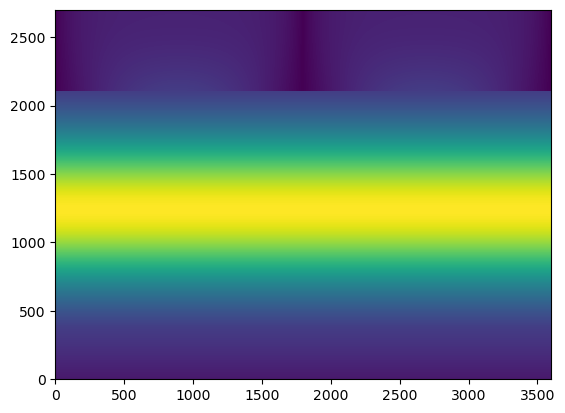

In [6]:
plt.pcolor(area_u)

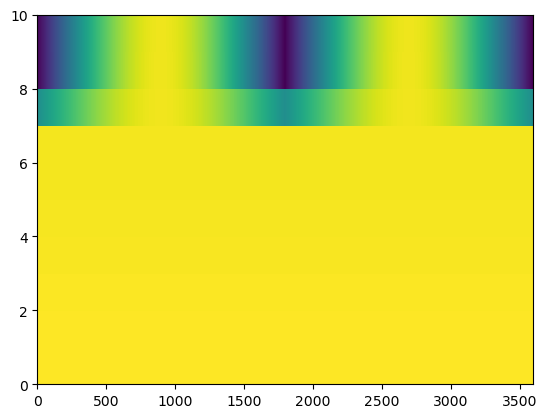

In [9]:
plt.pcolor(area_u[2100:2110,:])


In [16]:
ll /g/data/ik11/inputs/access-om2/

total 145971472
drwxrwxr-x+  2 aph502       36864 Feb 29 00:35 bin/
-rwxr-x---+  1 aek156         377 Jun 19  2020 copy_to_mdss_old_untested.sh*
-rwxr-x---+  1 aek156         783 Oct 20  2021 copy_to_mdss.sh*
drwxr-sr-x+  5 aek156        4096 Oct 22  2020 initial_conditions_access-om2/
drwxrwxr-x+ 18 aph502        4096 Feb  8  2019 input_08022019/
-rw-rwxr--+  1 aph502 13575478139 Nov 23  2017 input_154112e8.tar.gz*
drwxrwxr-x+  5 nah599        4096 Apr 22  2020 input_20200422/
drwxr-xr-x+ 14 aek156        4096 Oct 28  2020 input_20200530/
drwxrwxr-x+ 18 aph502        4096 Feb 12  2020 input_20200530_crufty/
drwxr-xr-x+ 14 aek156        4096 Oct 28  2020 input_20201022/
drwxr-xr-x+ 14 aek156        4096 Oct 28  2020 input_20201022_old_topog/
drwxr-xr-x+ 14 aek156        4096 Oct 28  2020 input_20201102/
drwxrwxr-x+  3 aek156        4096 Nov 20  2020 input_20201120/
drwxrwxr-x+  3 nah599        4096 Sep 15  2021 input_20210915/
drwxrwxr-x+  3 aek156        4096 Oct 20  2021 input_202110

In [13]:
cd /scratch/tm70/as2285/

/scratch/tm70/as2285


In [25]:
ls

1deg_jra55_iaf_anton_demo/  era5_datastore/        runconfig_cleanup/
96cores/                    experiments/           spack-config/
access-nri-intake-catalog/  iaf_ice_in/            test.csv.gz
access-om2/                 iaf_ice_in_noleap/     test.json
access-om3/                 intake-catalog/        test_tinz/
as2285/                     intake_datastore/      tmp/
cc_pytest/                  iss22/                 ww3-config/
cice-dirs/                  linux-rocky8-x86_64/   ww-config/
CICE_RUNS/                  out-MOZOUVEW/          year_align/
conda/                      ParallelIO-pio2_5_10/
cpu.svg                     pio2_6_2.tar.gz


In [26]:
cp /g/data/ik11/inputs/access-om2/input_154112e8.tar.gz .

In [29]:
! tar -xzvf input_154112e8.tar.gz

input/
input/oasis_jra55_to_025deg/
input/oasis_jra55_to_025deg/i2a.nc
input/oasis_jra55_to_025deg/rmp_jra55_runoff_cice_conserve.nc
input/oasis_jra55_to_025deg/a2i.nc
input/oasis_jra55_to_025deg/rmp_jra55_cice_smooth.nc
input/oasis_jra55_to_025deg/rmp_jrar_to_cict_CONSERV.nc
input/oasis_jra55_to_025deg/rmp_jra55_cice_conserve.nc
input/mom_1deg-old_grid/
input/mom_1deg-old_grid/ocean_temp_salt.res.nc
input/mom_1deg-old_grid/roughness_amp.nc
input/mom_1deg-old_grid/tideamp.nc
input/mom_1deg-old_grid/core_runoff_regrid.nc
input/mom_1deg-old_grid/grid_spec.nc
input/mom_1deg-old_grid/ssw_atten_depth.nc
input/mom_1deg-old_grid/basin_mask.nc
input/mom_1deg-old_grid/geothermal_heating.nc
input/mom_1deg-old_grid/temp_sfc_restore.nc
input/mom_1deg-old_grid/ocean_mask_table
input/mom_1deg-old_grid/mask_table.24.16x15
input/mom_1deg-old_grid/salt_sfc_restore.nc
input/mom_1deg/
input/mom_1deg/ocean_mosaic.nc
input/mom_1deg/ocean_temp_salt.res.nc
input/mom_1deg/ocean_mask.nc
input/mom_1deg/ocean_vg

In [14]:
cice_grid = xr.open_dataset('input/cice_1deg/grid.nc')

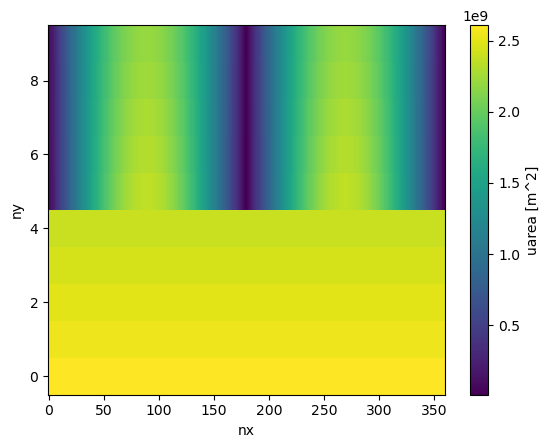

In [15]:
cice_grid.uarea.isel(ny=slice(240,250)).plot()

In [16]:
mom_grid = xr.open_dataset('input/mom_1deg/ocean_hgrid.nc')

In [17]:
mom_grid.area

<xarray.DataArray 'area' (ny: 600, nx: 720)>
[432000 values with dtype=float64]
Dimensions without coordinates: ny, nx
Attributes:
    standard_name:  grid_cell_area
    units:          m2

In [18]:
area = mom_grid.area

area_ext = np.append(area[:], area[:, 0:1], axis=1)
area_ext = np.append(area_ext[:], area_ext[-1:, :], axis=0)

area_u = area_ext[1::2, 1::2] + area_ext[2::2, 1::2] + \
    area_ext[2::2, 2::2] + area_ext[1::2, 2::2]

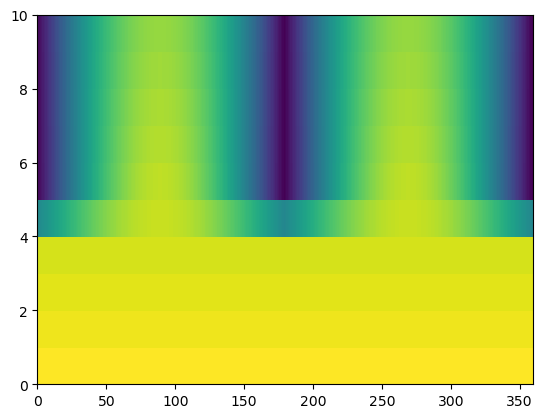

In [19]:
plt.pcolor(area_u[240:250,:])


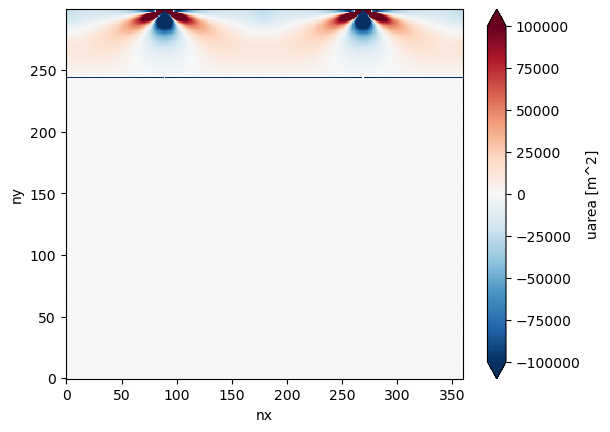

In [22]:
(area_u-cice_grid.uarea).plot(vmax=1e5)

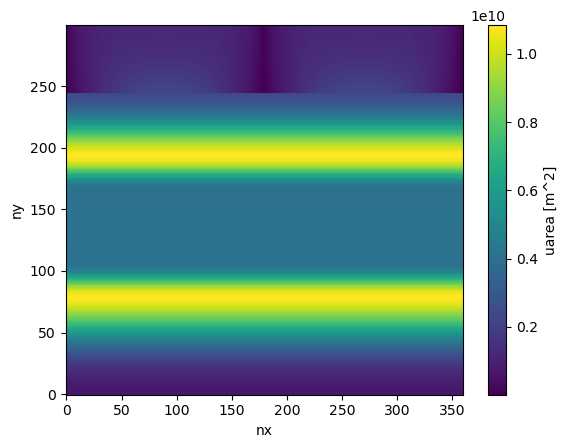

In [45]:
cice_grid.uarea.plot()

In [57]:
ls /g/data/ik11/grids/ocean_grid_025.nc

Antarctic_slope_contour_1000m.npz  om2_1deg_basinmask_yu_xu.nc
BlueMarble.tiff                    om2_p1deg_basinmask_yt_xt.nc
ferret.jnl                         om2_p1deg_basinmask_yt_xu.nc
ocean_grid_01.nc                   om2_p1deg_basinmask_yu_xt.nc
ocean_grid_025.nc                  om2_p1deg_basinmask_yu_xu.nc
ocean_grid_10.nc                   om2_p25deg_basinmask_yt_xt.nc
om2_1deg_basinmask_yt_xt.nc        om2_p25deg_basinmask_yt_xu.nc
om2_1deg_basinmask_yt_xu.nc        om2_p25deg_basinmask_yu_xt.nc
om2_1deg_basinmask_yu_xt.nc        om2_p25deg_basinmask_yu_xu.nc


In [128]:
ocean_grid = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc')

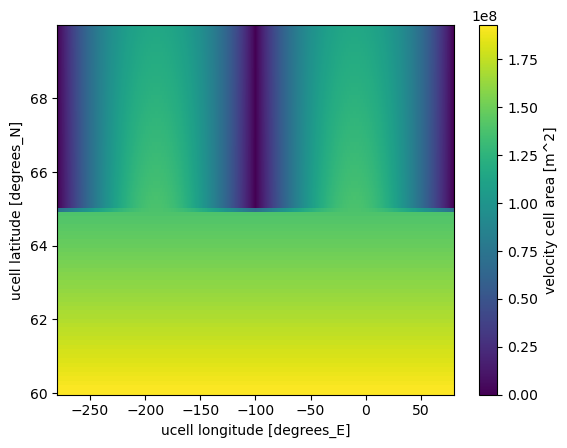

In [129]:
ocean_grid.area_u.sel(yu_ocean=slice(60,70)).plot()

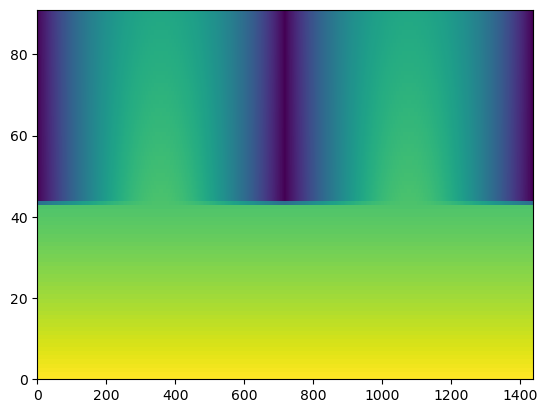

In [130]:
plt.pcolor(ocean_grid.area_u.sel(yu_ocean=slice(60,70)))

In [67]:
ocean_grid = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc')

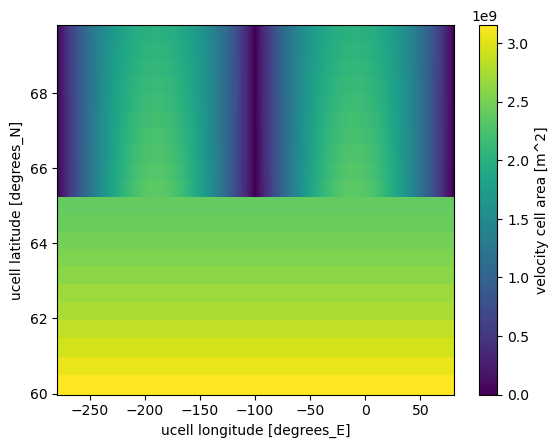

In [68]:
ocean_grid.area_u.sel(yu_ocean=slice(60,70)).plot()

In [69]:
ocean_grid = xr.open_dataset('/g/data/ik11/grids/ocean_grid_01.nc')

In [72]:
ocean_grid

<xarray.Dataset>
Dimensions:     (zt: 75, zb: 75, grid_y_T: 2700, grid_x_T: 3600,
                 grid_y_C: 2700, grid_x_C: 3600)
Coordinates:
  * zt          (zt) float32 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
  * zb          (zb) float32 1.083 2.279 3.601 ... 5.412e+03 5.61e+03 5.809e+03
Dimensions without coordinates: grid_y_T, grid_x_T, grid_y_C, grid_x_C
Data variables:
    geolon_t    (grid_y_T, grid_x_T) float64 ...
    geolon_c    (grid_y_C, grid_x_C) float64 ...
    geolat_t    (grid_y_T, grid_x_T) float64 ...
    geolat_c    (grid_y_C, grid_x_C) float64 ...
    depth_t     (grid_y_T, grid_x_T) float64 ...
    num_levels  (grid_y_T, grid_x_T) float64 ...
Attributes:
    history:  Fri Mar 20 16:34:09 2020: ncrename -v x_T,geolon_t -v x_C,geolo...
    NCO:      netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net, C...

In [105]:
def vecdot(v1, v2):
    """Return the dot product of vectors ``v1`` and ``v2``.
    ``v1`` and ``v2`` can be either numpy vectors or numpy.ndarrays
    in which case the last dimension is considered the dimension
    over which the dot product is taken of.
    """
    return np.sum(v1 * v2, axis=-1)

In [108]:

def angle_between(v1, v2, v3):
    """Return the angle ``v2``-``v1``-``v3`` (in radians), where
    ``v1``, ``v2``, ``v3`` are 3-vectors. That is, the angle that
    is formed between vectors ``v2 - v1`` and vector ``v3 - v1``.

    Example:

        >>> from regional_mom6.utils import angle_between
        >>> v1 = (0, 0, 1)
        >>> v2 = (1, 0, 0)
        >>> v3 = (0, 1, 0)
        >>> angle_between(v1, v2, v3)
        1.5707963267948966
        >>> from numpy import rad2deg
        >>> rad2deg(angle_between(v1, v2, v3))
        90.0
    """

    v1xv2 = np.cross(v1, v2)
    v1xv3 = np.cross(v1, v3)

    norm_v1xv2 = np.sqrt(vecdot(v1xv2, v1xv2))
    norm_v1xv3 = np.sqrt(vecdot(v1xv3, v1xv3))

    cosangle = vecdot(v1xv2, v1xv3) / (norm_v1xv2 * norm_v1xv3)

    return np.arccos(cosangle)

In [74]:
def quadrilateral_area(v1, v2, v3, v4):
    """Return the area of a spherical quadrilateral on the unit sphere that
    has vertices on the 3-vectors ``v1``, ``v2``, ``v3``, ``v4``
    (counter-clockwise orientation is implied). The area is computed via
    the excess of the sum of the spherical angles of the quadrilateral from 2π.

    Example:

        Calculate the area that corresponds to half the Northern hemisphere
        of a sphere of radius *R*. This should be 1/4 of the sphere's total area,
        that is π *R*:sup:`2`.

        >>> from regional_mom6.utils import quadrilateral_area, latlon_to_cartesian
        >>> R = 434.3
        >>> v1 = latlon_to_cartesian(0, 0, R)
        >>> v2 = latlon_to_cartesian(0, 90, R)
        >>> v3 = latlon_to_cartesian(90, 0, R)
        >>> v4 = latlon_to_cartesian(0, -90, R)
        >>> quadrilateral_area(v1, v2, v3, v4)
        592556.1793298927
        >>> from numpy import pi
        >>> quadrilateral_area(v1, v2, v3, v4) == pi * R**2
        True
    """

    v1 = np.array(v1)
    v2 = np.array(v2)
    v3 = np.array(v3)
    v4 = np.array(v4)

    if not (
        np.all(np.isclose(vecdot(v1, v1), vecdot(v2, v2)))
        & np.all(np.isclose(vecdot(v1, v1), vecdot(v2, v2)))
        & np.all(np.isclose(vecdot(v1, v1), vecdot(v3, v3)))
        & np.all(np.isclose(vecdot(v1, v1), vecdot(v4, v4)))
    ):
        raise ValueError("vectors provided must have the same length")

    R = np.sqrt(vecdot(v1, v1))

    a1 = angle_between(v1, v2, v4)
    a2 = angle_between(v2, v3, v1)
    a3 = angle_between(v3, v4, v2)
    a4 = angle_between(v4, v1, v3)

    return (a1 + a2 + a3 + a4 - 2 * np.pi) * R**2


def latlon_to_cartesian(lat, lon, R=1):
    """Convert latitude-longitude (in degrees) to Cartesian coordinates on
    a sphere of radius ``R``. By default ``R = 1``.

    Args:
        lat (float): Latitude (in degrees).
        lon (float): Longitude (in degrees).
        R (float): The radius of the sphere; default: 1.

    Returns:
        tuple: Tuple with the Cartesian coordinates ``x, y, z``

    Examples:

        Find the Cartesian coordinates that correspond to point with
        ``(lat, lon) = (0, 0)`` on a sphere with unit radius.

        >>> from regional_mom6.utils import latlon_to_cartesian
        >>> latlon_to_cartesian(0, 0)
        (1.0, 0.0, 0.0)

        Now let's do the same on a sphere with Earth's radius

        >>> from regional_mom6.utils import latlon_to_cartesian
        >>> R = 6371e3
        >>> latlon_to_cartesian(0, 0, R)
        (6371000.0, 0.0, 0.0)
    """

    x = R * np.cos(np.deg2rad(lat)) * np.cos(np.deg2rad(lon))
    y = R * np.cos(np.deg2rad(lat)) * np.sin(np.deg2rad(lon))
    z = R * np.sin(np.deg2rad(lat))

    return x, y, z

In [75]:
R = 6371e3

In [ ]:
v1 = latlon_to_cartesian(-280, 0, R)
v2 = latlon_to_cartesian(0, 90, R)
v3 = latlon_to_cartesian(90, 0, R)
v4 = latlon_to_cartesian(0, -90, R)
quadrilateral_area(v1, v2, v3, v4)

In [85]:
ocean_grid

<xarray.Dataset>
Dimensions:     (zt: 75, zb: 75, grid_y_T: 2700, grid_x_T: 3600,
                 grid_y_C: 2700, grid_x_C: 3600)
Coordinates:
  * zt          (zt) float32 0.5413 1.681 2.94 ... 5.313e+03 5.511e+03 5.709e+03
  * zb          (zb) float32 1.083 2.279 3.601 ... 5.412e+03 5.61e+03 5.809e+03
Dimensions without coordinates: grid_y_T, grid_x_T, grid_y_C, grid_x_C
Data variables:
    geolon_t    (grid_y_T, grid_x_T) float64 ...
    geolon_c    (grid_y_C, grid_x_C) float64 ...
    geolat_t    (grid_y_T, grid_x_T) float64 ...
    geolat_c    (grid_y_C, grid_x_C) float64 ...
    depth_t     (grid_y_T, grid_x_T) float64 ...
    num_levels  (grid_y_T, grid_x_T) float64 ...
Attributes:
    history:  Fri Mar 20 16:34:09 2020: ncrename -v x_T,geolon_t -v x_C,geolo...
    NCO:      netCDF Operators version 4.9.2 (Homepage = http://nco.sf.net, C...

In [86]:
ocean_grid = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc')

In [91]:
ocean_grid.geolon_t[0][0].values

array(-279.5, dtype=float32)

In [98]:
ocean_grid.geolat_t[0:5][0:5].values

array([[-77.876625, -77.876625, -77.876625, ..., -77.876625, -77.876625,
        -77.876625],
       [-77.629715, -77.629715, -77.629715, ..., -77.629715, -77.629715,
        -77.629715],
       [-77.38171 , -77.38171 , -77.38171 , ..., -77.38171 , -77.38171 ,
        -77.38171 ],
       [-77.13229 , -77.13229 , -77.13229 , ..., -77.13229 , -77.13229 ,
        -77.13229 ],
       [-76.88053 , -76.88053 , -76.88053 , ..., -76.88053 , -76.88053 ,
        -76.88053 ]], dtype=float32)

In [99]:
lon0=np.rad2deg(ocean_grid['geolon_t'][0,0].values)

In [100]:
lon1=np.rad2deg(ocean_grid['geolon_t'][1,1].values)

In [101]:
lat0=np.rad2deg(ocean_grid['geolat_t'][0,0].values)

In [102]:
lat1=np.rad2deg(ocean_grid['geolat_t'][1,1].values)

In [120]:
v1 = latlon_to_cartesian(lat0, lon0, R)
v2 = latlon_to_cartesian(lat0, lon1, R)
v3 = latlon_to_cartesian( lat1,lon1, R)
v4 = latlon_to_cartesian( lat1,lon0, R)

In [121]:
v1

(4994555.160850713, 509937.7393978429, -3922247.6583123207)

In [122]:
v2

(2269471.857121011, 4478293.674142408, -3922247.6583123207)

In [123]:
v3

(1767321.6290692803, 3487412.8299067076, -5030324.481606483)

In [124]:
v4

(3889444.7338724583, 397107.3681696894, -5030324.481606483)

In [125]:
quadrilateral_area(v1, v2, v3, v4) - ocean_grid.area_t[0][0].values

6720057184516.663

In [126]:
ocean_grid.area_t[0][0].values

array(6.4095296e+08, dtype=float32)